# Load the Lung Cancer Data:
Features considered:
- Smoker: Current Smoker, Previous Smoker, Non-smoker
- Gender: Man, Woman
- Age: Young($\leq$ 50), Old(>50)
- Mutation: EGFR or ALK mutation, Other Mutation, No Mutation
- Family: 
- Cancer: Breast, Collorectal, Head and Neck, Uterus cervical, Skin no melanoma, Other and No cancer
- Treatment: Chemotherapy, Radiotherapy, Immunitherapy, TKI, Surgery
- Stage: 
- Relapse: Progression, No Progression, Relapse

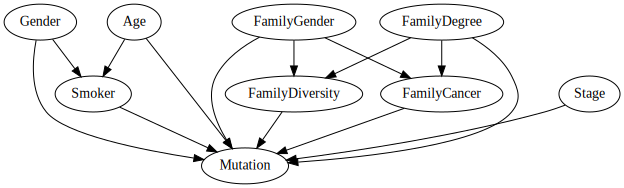

In [37]:
from graphviz import Digraph
# Create Digraph object
dot = Digraph()

# Nodes
dot.node('Smoker')
dot.node('Gender')
dot.node('Age')
dot.node('Mutation')
dot.node('FamilyGender')
dot.node('FamilyDiversity')
dot.node('FamilyDegree')
dot.node('FamilyCancer')
# dot.node('Cancer')
# dot.node('Treatment')
dot.node('Stage')
# dot.node('Relapse')

# Edges
lung_cancer_edges = [('Smoker', 'Mutation'), 
('Age', 'Smoker'), ('Age', 'Mutation'), # ('Age', 'Relapse'),
('Gender', 'Smoker'), ('Gender', 'Mutation'),
# ('Mutation', 'Treatment'),
# ('Treatment', 'Relapse'), ('Cancer', "Mutation"),
 ('Stage', 'Mutation'), ('FamilyDegree', 'FamilyDiversity'), ('FamilyDegree', 'FamilyCancer'), ('FamilyDegree', 'Mutation'),
('FamilyGender', 'Mutation'),  ('FamilyGender', 'FamilyDiversity'), ('FamilyGender', 'FamilyCancer'), ('FamilyCancer', 'Mutation'), ('FamilyDiversity', 'Mutation')]
# ('Stage', 'Treatment'), ('Stage', 'Relapse')]
# ('Family', 'Relapse'),
for head, tail in lung_cancer_edges:
    dot.edge(head, tail)

# dot.edge('Cancer', )

dot


In [3]:
print(type(float) == type)

True


# SPARQL

## Endpoint
https://labs.tib.eu/sdm/clarify-kg-7-1/sparql

## Queries
### Query 1.
```sql
SELECT DISTINCT ?EHR  ?AgeCategory  ?Gender  ?Smoking_habits ?Biomarker ?familyType ?CancerType WHERE {
        ?EHR1 a <http://clarify2020.eu/vocab/LCPatient>. 
        ?EHR1  <http://clarify2020.eu/vocab/has_LC_SLCG_ID> ?EHR. 

?EHR <http://clarify2020.eu/vocab/age> ?Age. bind( if(?Age>50,"OLDER","YOUNGER") as ?AgeCategory ) 

?EHR <http://clarify2020.eu/vocab/sex> ?Gender. 

OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasFamilyHistory> ?o. ?o <http://clarify2020.eu/vocab/familyType> ?familyType. ?o  <http://clarify2020.eu/vocab/hasFamilyCancerType>  ?CancerType.}

?EHR <http://clarify2020.eu/vocab/hasSmokingHabit> ?Smoking_habits.  FILTER (?Smoking_habits NOT IN (<http://clarify2020.eu/entity/UNK>)) 
 
OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasBio> ?Biomarker .}
}
```


### Query 2.
```sql
SELECT DISTINCT ?EHR  ?AgeCategory ?Gender ?Smoking_habits ?Stages ?familyType ?CancerType ?Biomarker ?Relapse WHERE {
        ?EHR1 a <http://clarify2020.eu/vocab/LCPatient>. 
        ?EHR1  <http://clarify2020.eu/vocab/has_LC_SLCG_ID> ?EHR. 

OPTIONAL { ?EHR <http://clarify2020.eu/vocab/age> ?Age. bind( if(?Age>50,"OLDER","YOUNGER") as ?AgeCategory ) }

OPTIONAL { ?EHR <http://clarify2020.eu/vocab/sex> ?Gender. }

?EHR <http://clarify2020.eu/vocab/hasDiagnosis> ?o2. 
OPTIONAL { ?o2 <http://clarify2020.eu/vocab/hasDiagnosisStage>?Stages. }

?EHR <http://clarify2020.eu/vocab/hasFamilyHistory> ?o. 
OPTIONAL { ?o <http://clarify2020.eu/vocab/familyType> ?familyType. } 
OPTIONAL { ?o  <http://clarify2020.eu/vocab/hasFamilyCancerType>  ?CancerType. }

OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasSmokingHabit> ?Smoking_habits. }

OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasBio> ?Biomarker. }

OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasProgressionRelapse> ?Relapse. }
}
```


### Query 3.
```sql
SELECT DISTINCT ?EHR  ?AgeCategory ?Gender ?Smoking_habits ?Stages ?familyType ?CancerType ?Biomarker ?Relapse WHERE {
        ?EHR1 a <http://clarify2020.eu/vocab/LCPatient>. 
        ?EHR1  <http://clarify2020.eu/vocab/has_LC_SLCG_ID> ?EHR. 

OPTIONAL { ?EHR <http://clarify2020.eu/vocab/age> ?Age. bind( if(?Age>50,"OLDER","YOUNGER") as ?AgeCategory ) }

OPTIONAL { ?EHR <http://clarify2020.eu/vocab/sex> ?Gender. }

OPTIONAL { ?EHR <http://clarify2020.eu/vocab/hasDiagnosis> ?o2. 
?o2 <http://clarify2020.eu/vocab/hasDiagnosisStage>?Stages. }

OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasFamilyHistory> ?o. 
?o <http://clarify2020.eu/vocab/familyType> ?familyType. 
?o <http://clarify2020.eu/vocab/hasFamilyCancerType> ?CancerType. }

OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasSmokingHabit> ?Smoking_habits. }

OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasBio> ?Biomarker. }

OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasProgressionRelapse> ?Relapse. }
}
```


### Query 4.
```sql
SELECT DISTINCT ?EHR  ?AgeCategory ?Gender ?Smoking_habits ?Stages ?HasFamily ?familyType ?CancerType ?Biomarker ?Relapse ?Date WHERE {
        ?EHR1 a <http://clarify2020.eu/vocab/LCPatient>. 
        ?EHR1  <http://clarify2020.eu/vocab/has_LC_SLCG_ID> ?EHR. 

OPTIONAL { ?EHR <http://clarify2020.eu/vocab/age> ?Age. bind( if(?Age>50,"OLDER","YOUNGER") as ?AgeCategory ) }

OPTIONAL { ?EHR <http://clarify2020.eu/vocab/sex> ?Gender. }

OPTIONAL { ?EHR <http://clarify2020.eu/vocab/hasDiagnosis> ?o2. 
?o2 <http://clarify2020.eu/vocab/hasDiagnosisStage>?Stages. }

OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasFamilyHistory> ?o. 
?o <http://clarify2020.eu/vocab/familyType> ?familyType. 
?o <http://clarify2020.eu/vocab/hasFamilyCancerType> ?CancerType. }

OPTIONAL {?EHR <http://clarify2020.eu/vocab/has_familyWithCancer_OrNot> ?HasFamily}

OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasSmokingHabit> ?Smoking_habits. }

OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasBio> ?Biomarker. }

OPTIONAL {?EHR <http://clarify2020.eu/vocab/date> ?Date.}

OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasProgressionRelapse> ?Relapse. }
}
```

### Query 5.
```sql
SELECT DISTINCT ?EHR  ?AgeCategory ?Gender ?Smoking_habits ?Stages ?familyType ?CancerType ?Biomarker WHERE {
        ?EHR1 a <http://clarify2020.eu/vocab/LCPatient>. 
        ?EHR1  <http://clarify2020.eu/vocab/has_LC_SLCG_ID> ?EHR. 

OPTIONAL { ?EHR <http://clarify2020.eu/vocab/age> ?Age. bind( if(?Age>50,"OLDER","YOUNGER") as ?AgeCategory ) }

OPTIONAL { ?EHR <http://clarify2020.eu/vocab/sex> ?Gender. }

OPTIONAL { ?EHR <http://clarify2020.eu/vocab/hasDiagnosis> ?o2. 
?o2 <http://clarify2020.eu/vocab/hasDiagnosisStage>?Stages. }

OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasFamilyHistory> ?o. 
?o <http://clarify2020.eu/vocab/familyType> ?familyType. 
?o <http://clarify2020.eu/vocab/hasFamilyCancerType> ?CancerType. }

OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasSmokingHabit> ?Smoking_habits. }

OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasBio> ?Biomarker. }
}
```

### Query 6. 
```sql
SELECT DISTINCT ?EHR  ?AgeCategory ?Gender ?Smoking_habits ?Stages ?HasFamily ?familyType ?CancerType ?Biomarker WHERE {
        ?EHR1 a <http://clarify2020.eu/vocab/LCPatient>. 
        ?EHR1  <http://clarify2020.eu/vocab/has_LC_SLCG_ID> ?EHR. 

OPTIONAL { ?EHR <http://clarify2020.eu/vocab/age> ?AgeCategory. }

OPTIONAL { ?EHR <http://clarify2020.eu/vocab/sex> ?Gender. }

OPTIONAL { ?EHR <http://clarify2020.eu/vocab/hasDiagnosis> ?o2. 
?o2 <http://clarify2020.eu/vocab/hasDiagnosisStage>?Stages. }

OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasFamilyHistory> ?o. 
?o <http://clarify2020.eu/vocab/familyType> ?familyType. 
?o <http://clarify2020.eu/vocab/hasFamilyCancerType> ?CancerType. }

OPTIONAL {?EHR <http://clarify2020.eu/vocab/has_familyWithCancer_OrNot> ?HasFamily}

OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasSmokingHabit> ?Smoking_habits. }

OPTIONAL {?EHR <http://clarify2020.eu/vocab/hasBio> ?Biomarker. }
}
```


http://clarify2020.eu/entity/Yes
http://clarify2020.eu/entity/No
http://clarify2020.eu/entity/UNK





SELECT DISTINCT ?EHR ?observation ?biomarker WHERE {
        ?EHR1 a <http://clarify2020.eu/vocab/LCPatient>. 
        ?EHR1  <http://clarify2020.eu/vocab/has_LC_SLCG_ID> ?EHR. 

?EHR <http://clarify2020.eu/vocab/hasBiomarker> ?observation.
?observation <http://clarify2020.eu/vocab/biomarker> ?biomarker.
?observation ?p ?o.

}



In [ ]:
[34, 2, 1, 80, 3, 21, 4]

# SQL over Clarify Database

https://labs.tib.eu/sdm/mysql/tbl_sql.php?db=SLCG_UPM_v5.0&table=alk_mutation
https://labs.tib.eu/sdm/clarify-kg-7-1/sparql

Mutation in table `biomarker_mutation` (**MET, KRAS, BRAF, HER2Mut, RET, FGFR1, NTKR**)
`study_performed`, `result`

1. No Mutation
SELECT DISTINCT `EHR` FROM `biomarker_mutation` WHERE (`study_performed` = 'MET' and `result`='3.0') 
or (`study_performed` = 'KRAS' and `result`='0.0') or (`study_performed` = 'BRAF' and `result`='0.0') or (`study_performed` = 'HER2Mut' and `result`='0.0') or (`study_performed` = 'RET' and `result`='0.0') or (`study_performed` = 'FGFR1' and `result`='0.0') or (`study_performed` = 'NTKR' and `result`='0.0')
2. Has Mutation
SELECT DISTINCT `EHR` FROM `biomarker_mutation` WHERE (`study_performed` = 'MET' and `result`!='3.0') 
or (`study_performed` = 'KRAS' and `result`!='0.0') or (`study_performed` = 'BRAF' and `result`!='0.0') or (`study_performed` = 'HER2Mut' and `result`!='0.0') or (`study_performed` = 'RET' and `result`!='0.0') or (`study_performed` = 'FGFR1' and `result`!='0.0') or (`study_performed` = 'NTKR' and `result`!='0.0')


**ALK**
1. Negative
SELECT DISTINCT t1.EHR FROM `alk_mutation` as t1 WHERE t1.EHR NOT IN (SELECT DISTINCT `EHR` FROM `alk_mutation` WHERE `result_alk_ihq` = '1.0' or `result_alk_fish` = '1.0' or `result_alk_rna` = '1.0') AND t1.EHR NOT IN (SELECT DISTINCT `EHR` FROM `alk_mutation` WHERE `result_alk_ihq` is NULL AND `result_alk_fish` is NULL AND `result_alk_rna` is NULL)
2. Positive
SELECT DISTINCT `EHR` FROM `alk_mutation` WHERE `result_alk_ihq` = '1.0' or `result_alk_fish` = '1.0' or `result_alk_rna` = '1.0'
3. UNK
SELECT DISTINCT `EHR` FROM `alk_mutation` WHERE `study_performed` is NULL

**EGFR**
1. Negative
SELECT DISTINCT `EHR` FROM `egfr_mutation` WHERE `result_egfr_negative` = '1.0'
2. Positive
//can be postive or null SELECT DISTINCT `EHR` FROM `egfr_mutation` WHERE `result_egfr_negative` IS NULL

SELECT DISTINCT ?EHR WHERE {
        ?EHR1 a <http://clarify2020.eu/vocab/LCPatient>. 
        ?EHR1  <http://clarify2020.eu/vocab/has_LC_SLCG_ID> ?EHR. 
?EHR <http://clarify2020.eu/vocab/hasBio> <http://clarify2020.eu/entity/EGFR> 
}
3. UNK
SELECT DISTINCT `EHR` FROM `egfr_mutation` WHERE `study_performed` is NULL

**HER2** 
1. Nagative
SELECT DISTINCT t1.EHR from `her2_mutation` as t1 WHERE t1.EHR NOT IN (SELECT DISTINCT `EHR` FROM `her2_mutation` WHERE `result_her2_ihq` = '1.0' or `result_her2_fish` = '1.0') and t1.EHR NOT IN (SELECT DISTINCT `EHR` FROM `her2_mutation` WHERE `result_her2_ihq` IS NULL and `result_her2_fish` IS NULL)
2. Positive
SELECT DISTINCT `EHR` FROM `her2_mutation` WHERE (`result_her2_ihq` = '1.0' or `result_her2_fish` = '1.0')
3. UNK
SELECT DISTINCT `EHR` FROM `her2_mutation` WHERE `study_performed` is NULL

**ROS1**

1. Negative
SELECT DISTINCT t1.EHR FROM `ros1_mutation` as t1 WHERE t1.EHR NOT IN (SELECT DISTINCT EHR FROM `ros1_mutation` WHERE `result_ros1_ihq` = '1.0' or `result_ros1_fish` = '1.0') and t1.EHR NOT IN (SELECT DISTINCT EHR FROM `ros1_mutation` WHERE `result_ros1_ihq` IS NULL and `result_ros1_fish` IS NULL)
2. Positive
SELECT DISTINCT `EHR` FROM `ros1_mutation` WHERE (`result_ros1_ihq` = '1.0' or `result_ros1_fish` = '1.0')
3. UNK
SELECT EHR FROM `ros1_mutation` WHERE `study_performed` is NULL

**PDL1**
1. Negative
SELECT DISTINCT `EHR` FROM `pdl1_expression` WHERE `result` = '0.0'
2. Positive
SELECT DISTINCT `EHR` FROM `pdl1_expression` WHERE `result` = '1.0'
3. UNK
SELECT EHR FROM `pdl1_expression` WHERE `study_performed` is NULL


In [1]:
import os
import pandas as pd

def no_mutations():
    dir_name = 'positive_negative_mutation'
    pos_pids = set()
    neg_pids = set()
    for fname in os.listdir(dir_name):
        pids = set([str(e).strip() for e in pd.read_csv(os.path.join(dir_name, fname))['EHR'].values])
        if 'negative' in fname:
            # print('neg', fname)
            neg_pids = neg_pids.union(pids)
        elif 'positive' in fname:
            # print('pos', fname)
            pos_pids = pos_pids.union(pids)

    no_mutation_pids = neg_pids.difference(pos_pids)
    return no_mutation_pids
no_mutation_pids = no_mutations()


In [2]:
print(list(no_mutation_pids)[:20])

['6400372', '201637', '3005647', '509355', '1315615', '202358', '300854', '1303585', '3000766', '2805001', '5109451', '6313533', '1201125', '703827', '2811819', '4600212', '3508839', '2808917', '9408892', '3404076']


# Process Data

In [3]:
import copy
from collections import Counter
import numpy as np
import pandas as pd

no_mutation_pids = no_mutations()

def clean_df(df_in):
    df = copy.deepcopy(df_in)
    
    original_feature_names = ["EHR","AgeCategory","Gender", "Smoking_habits", "Stages","Drug","familyType","CancerType","Biomarker","Relapse", "Date", "HasFamily"]
    new_feature_names = ["Patient_id", 'Age', "Gender", "Smoker", "Stage", "Treatment", "Family", "Cancer", "Mutation", "Relapse", "Date", "HasFamily"]
    
    df.rename(columns = dict(zip(original_feature_names, new_feature_names)), inplace = True)

    df = df.fillna('NULL') 

    df.replace('\s+','',regex=True,inplace=True) 
    for feature in new_feature_names:
        if feature not in df.head().columns:
            continue
        df[feature] = df[feature].str.replace("http://clarify2020.eu/entity/", '')
    
    for name in new_feature_names:
        if name not in df.columns:
            continue
        elif len(set(df[name].values)) < 30:
            print(name+":\t", Counter(df[name].values))

    return df

def filter_out_df(df_in):
    # df = copy.deepcopy(df_in)
    # df = df.loc[(df.Family != 'UNK')]   # filter out UNK famliy  & (df.Family != 'Halfbrother') & (df.Family != 'Halfsister')
    # print("--------\n", df.Stage.value_counts())
    # print("patient number: ", len(set(df.loc[(df.Stage.isin(['Extendido','Limitado','Otros']) )].Patient_id.values.tolist())))
    
    # df = df.loc[(df.Stage != 'Extendido') & (df.Stage != 'Limitado') & (df.Stage != 'Otros')]   # filter out Lung Cancer Stage
    # df = df.loc[(df.Cancer != 'UNK')]
    # df = df.loc[(df.Relapse != "UNK")]
    return df_in


def add_family_diversity(tmp_df):
    import copy
    from collections import Counter
    df1 = copy.deepcopy(tmp_df)
    df1 = df1[['Patient_id', 'Family']]
    df1.drop_duplicates(subset=['Patient_id', 'Family'],keep='first', inplace=True)
    
    unk_family_p_id = set(df1[(df1.Family == 'UNK')].Patient_id.values)     # p1: UNK, Father, Brother (one patient, multiple relatives)
    no_family_p_id = set(df1[(df1.Family=='No')].Patient_id.values)         # p1: UNK, Father, Brother
    null_family_p_id = set(df1[(df1.Family=='NULL')].Patient_id.values)
    df2 = df1.loc[(df1.Family != 'UNK') & (df1.Family != 'No') & (df1.Family != 'NULL')]
    
    has_family_id = set(df2.Patient_id.values.tolist())
    df2['FamilyDiversity'] = df2.groupby('Patient_id')['Family'].transform('count')
    df2 = df2.drop(columns=['Family'])
    df2.drop_duplicates(inplace=True)
    
    df2.loc[df2['FamilyDiversity'] > 2, 'FamilyDiversity'] = 3
    df2.FamilyDiversity.replace(to_replace={1:"One", 2:"Two", 3:"More"}, inplace=True)
    df2 = pd.concat([df2, pd.DataFrame([{'Patient_id': p_id, 'FamilyDiversity': 'UNK'} for p_id in unk_family_p_id if p_id not in has_family_id])])
    df2 = pd.concat([df2, pd.DataFrame([{'Patient_id': p_id, 'FamilyDiversity': 'Zero'} for p_id in no_family_p_id if p_id not in has_family_id])])
    df2 = pd.concat([df2, pd.DataFrame([{'Patient_id': p_id, 'FamilyDiversity': 'Zero'} for p_id in null_family_p_id if p_id not in has_family_id])])
    
    print("FamilyDiversity:", Counter(df2.FamilyDiversity.values))
    
    assert len(set(tmp_df.Patient_id.values).intersection(set(df2.Patient_id.values))) == len(set(tmp_df.Patient_id.values).union(set(df2.Patient_id.values)))
    tmp_df = tmp_df.merge(df2, on='Patient_id', how='left')
    assert set(tmp_df.Patient_id.values) == set(df2.Patient_id.values)
    
    # tmp_df['FamilyDiversity'].mask(tmp_df.Patient_id.isin(unk_family_p_id.difference(has_family_id)), "no", inplace=True)    # unk family cannot how many family members
    
    return tmp_df

def replace_df(df_in, mutation_option, cancer_option):
    df = copy.deepcopy(df_in)
    # Family
    # ['Nephew', 'Father', 'Uncle', 'Male_Cousin', 'Halfbrother', 'Female_Cousin', 'Mother', 'Niece', 'Daughter', 'Granddaughter', 'UNK', 'Halfsister', 'Grandgrandfather', 'Grandfather', 'Grandmother', 'Son', 'Grandgrandmother', 'Grandson', 'Sister', 'Aunt', 'Brother', 'No'] 
    if 'HasFamily' in df.columns:
        pid_no_family = set(df.loc[(df['HasFamily'] == 'No')].Patient_id)
        # print("<<<<,------------<<<<<<<  no family", len(pid_no_family))
        df['Family'].mask(df.Patient_id.isin(pid_no_family) & df.Family.isin(['UNK', 'NULL']), 'No', inplace=True)
        pid_unk_family = set(df.loc[(df['HasFamily'] == 'UNK')].Patient_id)
        df['Family'].mask(df.Patient_id.isin(pid_unk_family) & df.Family.isin(['UNK', 'NULL']), 'UNK', inplace=True)
        df.drop(columns=['HasFamily'], inplace=True)

    # Add family diversity
    df = add_family_diversity(df)

    print("FamilyDiversity: \t", Counter(df.FamilyDiversity.values))
    
    family_dict1 = dict(zip(["Father", "Mother", "Grandfather", "Grandmother", 'Grandgrandfather', 'Grandgrandmother'], ['Ancestor', 'Ancestor', 'Ancestor', 'Ancestor', 'Ancestor', 'Ancestor']))
    for val in df['Family'].unique():
        if val in family_dict1.keys():
            continue
        else:
            family_dict1[val] = 'NotAncestor'
    
    df['family'] = df.Family.replace(to_replace=family_dict1)
    # print(Counter(df['family'].values))
    t_ids = set(df.loc[(df.family == 'Ancestor')].Patient_id.values)
    unk_family_p_id = set(df.loc[(df.Family == "UNK")].Patient_id.values)
    no_family_p_id = set(df.loc[(df.Family == 'No')].Patient_id.values)
    null_family_p_id = set(df.loc[(df.Family == 'NULL')].Patient_id.values)
    df['family'].mask(~df.Patient_id.isin(no_family_p_id.union(unk_family_p_id).union(null_family_p_id).union(t_ids)), 'NotAncester', inplace=True)
    df['family'].mask(df.Patient_id.isin(no_family_p_id), 'No', inplace=True)
    df['family'].mask(df.Patient_id.isin(null_family_p_id.union(unk_family_p_id)), 'UNK', inplace=True)
    df['family'].mask(df.Patient_id.isin(t_ids), 'Ancester', inplace=True)
    
    # https://en.wikipedia.org/wiki/First-degree_relative, https://en.wikipedia.org/wiki/Second-degree_relative, https://en.wikipedia.org/wiki/Third-degree_relative 
    # https://en.wiktionary.org/wiki/first-degree_relative, https://en.wiktionary.org/wiki/second-degree_relative, https://en.wiktionary.org/wiki/third-degree_relative
    family = ["UNK", "Father", "Mother", "Brother", "Sister", "Daughter", "Son", "Uncle", "Nephew", "Grandfather", "Grandmother", "Aunt", "Niece", 'Granddaughter', 'Grandson', 'Grandgrandfather', 'Grandgrandmother', "No", 'Halfsister', 'Halfbrother', 'Female_Cousin', 'Male_Cousin', 'NULL']
    family_replace = ["UNK", "M1", 'F1', 'M1', 'F1', 'F1', 'M1', 'M2', 'M2', 'M2', 'F2', 'F2', 'F2', 'F2', 'M2', 'M3', 'F3', 'No', 'F2', 'M2', 'F3', 'M3', 'NULL']
    family_dict = {e: family_replace[i] for i, e in enumerate(family)}
    
    # print("family ----- ", set(df.Family.values).difference(set(family)))
    assert len(set(df.Family.values).difference(set(family))) == 0
    
    df.Family.replace(to_replace=family_dict, inplace=True)
    
    df2 = df.loc[(df.Family != 'UNK') & (df.Family != 'No') & (df.Family != 'NULL')]
    has_family_id = set(df2.Patient_id.values.tolist())     # has other family except UNK and NULL
    unk_family_p_id = set(df.loc[(df.Family == "UNK")].Patient_id.values)
    no_family_p_id = set(df.loc[(df.Family == 'No')].Patient_id.values)
    null_family_p_id = set(df.loc[(df.Family == 'NULL')].Patient_id.values)

    # df['Family'].mask(df.Patient_id.isin(unk_family_p_id.difference(has_family_id)), "UNK", inplace=True)     # UNK family type
    # df['Family'].mask(df.Patient_id.isin(no_family_p_id.difference(has_family_id)), "No", inplace=True)       # No family type
    # df['Family'].mask(df.Patient_id.isin(null_family_p_id.difference(has_family_id)), "NULL", inplace=True)

    df['FamilyGender'] = df['Family']
    df['FamilyDegree'] = df['Family']
    df = df.drop(columns=['Family'])

    # Family Gender: only woman family, only man family, woman and man family, No 
    wf_id_set = set(df.loc[(df.FamilyGender.isin(['F4', 'F1','F2','F3']))].Patient_id)
    mf_id_set = set(df.loc[(df.FamilyGender.isin(['M4', 'M1','M2','M3']))].Patient_id)
    wmf_id_interset = wf_id_set.intersection(mf_id_set)
    
    df['FamilyGender'].mask(df.Patient_id.isin(no_family_p_id.difference(has_family_id)), 'No', inplace=True)
    df['FamilyGender'].mask(df.Patient_id.isin(unk_family_p_id.difference(has_family_id)), 'UNK', inplace=True)
    df['FamilyGender'].mask(df.Patient_id.isin(null_family_p_id.difference(has_family_id)), 'UNK', inplace=True)
    
    df['FamilyGender'].mask(df.Patient_id.isin(wf_id_set.difference(mf_id_set)), 'Woman', inplace=True)
    df['FamilyGender'].mask(df.Patient_id.isin(mf_id_set.difference(wf_id_set)), 'Man', inplace=True)
    df['FamilyGender'].mask(df.Patient_id.isin(wmf_id_interset), 'ManAndWoman', inplace=True)
    print("Family Gender:\t", Counter(df.FamilyGender.values))

    # Family Degree: priority First Degree > Second Degree > Third Degree > Fourth Degree
    patient_id1 = set(df.loc[(df.FamilyDegree.isin(["M1", 'F1']))].Patient_id)
    patient_id2 = set(df.loc[(df.FamilyDegree.isin(["M2", 'F2']))].Patient_id)
    patient_id3 = set(df.loc[(df.FamilyDegree.isin(["M3", 'F3']))].Patient_id)
    patient_id4 = set(df.loc[(df.FamilyDegree.isin(["M4", 'F4']))].Patient_id)
    
    df['FamilyDegree'].mask(df.Patient_id.isin(no_family_p_id.difference(has_family_id)), "No", inplace=True)
    df['FamilyDegree'].mask(df.Patient_id.isin(unk_family_p_id.difference(has_family_id)), "UNK", inplace=True)
    df['FamilyDegree'].mask(df.Patient_id.isin(null_family_p_id.difference(has_family_id)), "No", inplace=True)
    
    df['FamilyDegree'].mask(df.Patient_id.isin(patient_id4), "Degree34", inplace=True)   # 
    df['FamilyDegree'].mask(df.Patient_id.isin(patient_id3), "Degree34", inplace=True)
    df['FamilyDegree'].mask(df.Patient_id.isin(patient_id2), "Degree2", inplace=True)
    df['FamilyDegree'].mask(df.Patient_id.isin(patient_id1), "Degree1", inplace=True)
    
    print("Ambiguous id should be Empty set ----------", no_family_p_id.intersection(patient_id1.union(patient_id2).union(patient_id3).union(patient_id4)))
    print("Family Degree:\t", Counter(df.FamilyDegree.values))
    
    # Cancer
    if cancer_option == 0:      # major and minor cancer
        # Major Cancer: 'Breast', 'Lung', 'Colorrectal', 'Head_and_neck', 'Uterus/cervical', 'Esophagogastric', 'Prostate'
        cancer = ['Breast', 'Lung', 'Colorrectal', 'Head_and_neck', 'Uterus/cervical', 'Esophagogastric', 'Prostate', 'Leukemia', 'NULL', 'UNK']
        cancer_replace = ['MajorCancer', 'MajorCancer', 'MajorCancer', 'MajorCancer', 'MajorCancer', 'MajorCancer', 'MajorCancer', 'MajorCancer', 'NULL', 'UNK']
        cancer_dict = {e: cancer_replace[i] for i, e in enumerate(cancer)}
        
        for other_cancer in set(df.Cancer.values):
            if other_cancer in cancer:
                continue
            cancer_dict[other_cancer] = 'MinorCancer'
        df.Cancer.replace(to_replace=cancer_dict, inplace=True)

        unk_cancer_p_id = set(df[(df.Cancer == "UNK")].Patient_id.values)
        null_cancer_p_id = set(df[(df.Cancer == "NULL")].Patient_id.values)
        major_id_set = set(df.loc[(df.Cancer.isin(['MajorCancer']))].Patient_id)
        minor_id_set = set(df.loc[(df.Cancer.isin(['MinorCancer']))].Patient_id)
        major_and_minor_id_set = major_id_set.intersection(minor_id_set)
        major_or_minor_id_set = major_id_set.union(minor_id_set)
        
        df['Cancer'].mask(df.Patient_id.isin(no_family_p_id.difference(has_family_id)), 'No', inplace=True) # has no family
        df['Cancer'].mask(df.Patient_id.isin(null_cancer_p_id.difference(major_or_minor_id_set.union(unk_cancer_p_id))), 'No', inplace=True)
        df['Cancer'].mask(df.Patient_id.isin(unk_cancer_p_id.difference(major_or_minor_id_set.union(null_cancer_p_id))), 'UNK', inplace=True)
        # df['Cancer'].mask(df.Patient_id.isin(unk_cancer_p_id), 'MajorCancer', inplace=True)
        df['Cancer'].mask(df.Patient_id.isin(major_id_set), 'MajorCancer', inplace=True)
        df['Cancer'].mask(df.Patient_id.isin(minor_id_set), 'MinorCancer', inplace=True)
        df['Cancer'].mask(df.Patient_id.isin(major_and_minor_id_set), 'MixCancer', inplace=True)
    if cancer_option == 1:  # lung cancer and other cancer
        assert 'No' not in set(df.Cancer.values)
        cancer = ['Lung', 'NULL', 'UNK']
        cancer_replace = ['Lung', 'NULL', 'UNK']
        cancer_dict = {e: cancer_replace[i] for i, e in enumerate(cancer)}

        for other_cancer in set(df.Cancer.values):
            if other_cancer in cancer:
                continue
            cancer_dict[other_cancer] = 'OtherCancer'
        df.Cancer.replace(to_replace=cancer_dict, inplace=True)
        
        lung_cancer_p_id = set(df[(df.Cancer == "Lung")].Patient_id.values)
        other_cancer_p_id = set(df[(df.Cancer == 'OtherCancer')].Patient_id.values)
        had_cancer_p_id = lung_cancer_p_id.union(other_cancer_p_id)
        unk_cancer_p_id = set(df[(df.Cancer == "UNK")].Patient_id.values)
        null_cancer_p_id = set(df[(df.Cancer == "NULL")].Patient_id.values)

        df['Cancer'].mask(df.Patient_id.isin(no_family_p_id.difference(has_family_id)), 'No', inplace=True) # has no family
        df['Cancer'].mask(df.Patient_id.isin(null_cancer_p_id.difference(had_cancer_p_id.union(unk_cancer_p_id))), 'No', inplace=True)
        df['Cancer'].mask(df.Patient_id.isin(unk_cancer_p_id.difference(had_cancer_p_id.union(null_cancer_p_id))), 'UNK', inplace=True)

        df['Cancer'].mask(df.Patient_id.isin(lung_cancer_p_id), 'LungCancer', inplace=True)
        df['Cancer'].mask(df.Patient_id.isin(other_cancer_p_id.difference(lung_cancer_p_id)), 'OtherCancer', inplace=True)
        df['Cancer'].mask(df.Patient_id.isin(other_cancer_p_id.intersection(lung_cancer_p_id)), 'MixCancer', inplace=True)
    if cancer_option == 2:  # inheritable cancer: Breast, Colon, Bladder, Ovarian
        assert 'No' not in set(df.Cancer.values)
        cancer = ['Breast', 'Ovarian', 'Colorrectal', 'Bladder/urinary_tract', 'NULL', 'UNK']
        cancer_replace = ['InheritableCancer', 'InheritableCancer', 'InheritableCancer', 'InheritableCancer', 'NULL', 'UNK']
        cancer_dict = {e: cancer_replace[i] for i, e in enumerate(cancer)}

        for other_cancer in set(df.Cancer.values):
            if other_cancer in cancer:
                continue
            cancer_dict[other_cancer] = 'OtherCancer'
        df.Cancer.replace(to_replace=cancer_dict, inplace=True)

        inheratable_cancer_p_id = set(df[(df.Cancer == 'InheritableCancer')].Patient_id.values)
        other_cancer_p_id = set(df[(df.Cancer == 'OtherCancer')].Patient_id.values)
        had_cancer_p_id = inheratable_cancer_p_id.union(other_cancer_p_id)
        unk_cancer_p_id = set(df[(df.Cancer == "UNK")].Patient_id.values)
        null_cancer_p_id = set(df[(df.Cancer == "NULL")].Patient_id.values)
        
        df['Cancer'].mask(df.Patient_id.isin(no_family_p_id.difference(has_family_id)), 'No', inplace=True) # has no family
        df['Cancer'].mask(df.Patient_id.isin(null_cancer_p_id.difference(had_cancer_p_id.union(unk_cancer_p_id))), 'No', inplace=True)
        df['Cancer'].mask(df.Patient_id.isin(unk_cancer_p_id.difference(had_cancer_p_id.union(null_cancer_p_id))), 'UNK', inplace=True)
        
        df['Cancer'].mask(df.Patient_id.isin(inheratable_cancer_p_id), 'InheritableCancer', inplace=True)
        df['Cancer'].mask(df.Patient_id.isin(had_cancer_p_id.difference(inheratable_cancer_p_id)), 'OtherCancer', inplace=True)
        df['Cancer'].mask(df.Patient_id.isin(had_cancer_p_id.intersection(inheratable_cancer_p_id)), 'MixCancer', inplace=True)
        
        # 'NULL': 10557, 'Lung': 2201, 'Breast': 1368, 'Colorrectal': 1213, 'Esophagogastric': 848, 'Head_and_neck': 716,
        #  'Other': 690, 'Prostate': 632, 'Pancreatic': 354, 'Uterus/cervical': 346, 'Leukemia': 345, 'Liver': 329, 
        # 'Unknown_origin_carcinoma': 258, 'Central_nervous_system': 244, 'Bladder/urinary_tract': 231, 'Lymphoma': 167, 
        # 'Renal': 140, 'Melanoma': 105, 'Ovarian': 91, 'Skin_no_melanoma': 59, 'Sarcoma': 49, 'Germinal_tumors': 33, 'Gall_bladder': 27, 'UNK': 21

    print("Cancer: \t", Counter(df.Cancer.values))
    
    # Mutation
    df['Mutation'].mask(df.Mutation == 'NULL', "UNK", inplace=True)
    if mutation_option == 0:
        mutation = ['ALK', 'EGFR', 'UNK']
        mutation_replace = ['ALKorEGFR', 'ALKorEGFR', 'UNK'] 
        mutation_dict = {e: mutation_replace[i] for i, e in enumerate(mutation)}
        
        unk_mutation_p_id = set(df[(df.Mutation == 'UNK')].Patient_id.values)
        
        for other_mut in set(df.Mutation.values):
            if other_mut in mutation:
                continue
            mutation_dict[other_mut] = 'Other'
        
        print(mutation_dict)
        
        df.Mutation.replace(to_replace=mutation_dict, inplace=True)
        
        # Remove Intersection part
        target_mutation_id = set(df.loc[df.Mutation == 'ALKorEGFR'].Patient_id.values)
        un_target_muatation_id = set(df.loc[df.Mutation == 'Other'].Patient_id.values)
        
        df['Mutation'].mask(df.Patient_id.isin(unk_mutation_p_id), "UNK", inplace=True)         # UNK
        df['Mutation'].mask(df.Patient_id.isin(no_mutation_pids), "NoMutation", inplace=True)           # No
        df['Mutation'].mask(df.Patient_id.isin(target_mutation_id), "ALKorEGFR", inplace=True)
        df['Mutation'].mask(df.Patient_id.isin(un_target_muatation_id.difference(target_mutation_id)), "Other", inplace=True)
    elif mutation_option == 1:
        mutation = ['ALK', 'EGFR', 'UNK']
        mutation_replace = ['Other', 'EGFR', 'UNK'] 
        mutation_dict = {e: mutation_replace[i] for i, e in enumerate(mutation)}
        
        unk_mutation_p_id = set(df[(df.Mutation == 'UNK')].Patient_id.values)
        
        for other_mut in set(df.Mutation.values):
            if other_mut in mutation:
                continue
            mutation_dict[other_mut] = 'Other'
        
        print(mutation_dict)
        
        df.Mutation.replace(to_replace=mutation_dict, inplace=True)
        
        # Remove Intersection part
        target_mutation_id = set(df.loc[df.Mutation == 'EGFR'].Patient_id.values)
        un_target_muatation_id = set(df.loc[df.Mutation == 'Other'].Patient_id.values)
        
        df['Mutation'].mask(df.Patient_id.isin(unk_mutation_p_id), "UNK", inplace=True)         # UNK
        df['Mutation'].mask(df.Patient_id.isin(no_mutation_pids), "NoMutation", inplace=True)           # No
        df['Mutation'].mask(df.Patient_id.isin(target_mutation_id), "EGFR", inplace=True)
        df['Mutation'].mask(df.Patient_id.isin(un_target_muatation_id.difference(target_mutation_id)), "Other", inplace=True)
    elif mutation_option == 2:
        mutation = ['ALK', 'EGFR', 'UNK']
        mutation_replace = ['ALK', 'Other', 'UNK'] 
        mutation_dict = {e: mutation_replace[i] for i, e in enumerate(mutation)}
        
        unk_mutation_p_id = set(df[(df.Mutation == 'UNK')].Patient_id.values)
        
        for other_mut in set(df.Mutation.values):
            if other_mut in mutation:
                continue
            mutation_dict[other_mut] = 'Other'
        
        print(mutation_dict)
        
        df.Mutation.replace(to_replace=mutation_dict, inplace=True)
        
        # Remove Intersection part
        target_mutation_id = set(df.loc[df.Mutation == 'ALK'].Patient_id.values)
        un_target_muatation_id = set(df.loc[df.Mutation == 'Other'].Patient_id.values)
        
        df['Mutation'].mask(df.Patient_id.isin(unk_mutation_p_id), "UNK", inplace=True)         # UNK
        df['Mutation'].mask(df.Patient_id.isin(no_mutation_pids), "NoMutation", inplace=True)           # No
        df['Mutation'].mask(df.Patient_id.isin(target_mutation_id), "ALK", inplace=True)
        df['Mutation'].mask(df.Patient_id.isin(un_target_muatation_id.difference(target_mutation_id)), "Other", inplace=True)
    # df['Mutation'].mask(df.Patient_id.isin(target_mutation_id.intersection(un_target_muatation_id)), "ALKorEGFR", inplace=True)
    elif mutation_option == 3:
        mutation = ['ALK', 'EGFR', 'UNK']
        mutation_replace = ['ALK', 'Other', 'UNK'] 
        mutation_dict = {e: mutation_replace[i] for i, e in enumerate(mutation)}
        
        unk_mutation_p_id = set(df[(df.Mutation == 'UNK')].Patient_id.values)
        
        for other_mut in set(df.Mutation.values):
            if other_mut in mutation:
                continue
            mutation_dict[other_mut] = 'Other'
        
        print(mutation_dict)
        
        df.Mutation.replace(to_replace=mutation_dict, inplace=True)
        
        # Remove Intersection part
        target_mutation_id = set(df.loc[df.Mutation == 'ALK'].Patient_id.values)
        un_target_muatation_id = set(df.loc[df.Mutation == 'Other'].Patient_id.values)
        
        df['Mutation'].mask(df.Patient_id.isin(unk_mutation_p_id), "NoMutation", inplace=True)         # UNK
        df['Mutation'].mask(df.Patient_id.isin(no_mutation_pids), "NoMutation", inplace=True)           # No
        df['Mutation'].mask(df.Patient_id.isin(target_mutation_id), "Mutation", inplace=True)
        df['Mutation'].mask(df.Patient_id.isin(un_target_muatation_id.difference(target_mutation_id)), "Mutation", inplace=True)
    elif mutation_option == 4:
        mutation = ['ALK', 'EGFR', 'HER2', 'UNK']
        mutation_replace = ['ALK_EGFR_HER', 'ALK_EGFR_HER', 'ALK_EGFR_HER', 'UNK'] 
        mutation_dict = {e: mutation_replace[i] for i, e in enumerate(mutation)}
        
        unk_mutation_p_id = set(df[(df.Mutation == 'UNK')].Patient_id.values)
        
        for other_mut in set(df.Mutation.values):
            if other_mut in mutation:
                continue
            mutation_dict[other_mut] = 'Other'
        
        print(mutation_dict)
        
        df.Mutation.replace(to_replace=mutation_dict, inplace=True)
        
        # Remove Intersection part
        target_mutation_id = set(df.loc[df.Mutation == 'ALK_EGFR_HER'].Patient_id.values)
        un_target_muatation_id = set(df.loc[df.Mutation == 'Other'].Patient_id.values)
        
        df['Mutation'].mask(df.Patient_id.isin(unk_mutation_p_id), "NoMutation", inplace=True)         # UNK
        df['Mutation'].mask(df.Patient_id.isin(no_mutation_pids), "NoMutation", inplace=True)           # No
        df['Mutation'].mask(df.Patient_id.isin(target_mutation_id), "ALK_EGFR_HER", inplace=True)
        df['Mutation'].mask(df.Patient_id.isin(un_target_muatation_id.difference(target_mutation_id)), "Other", inplace=True)
    elif mutation_option == 5:
        mutation = ['PDL1',  'UNK']
        mutation_replace = ['PDL1', 'UNK'] 
        mutation_dict = {e: mutation_replace[i] for i, e in enumerate(mutation)}
        
        unk_mutation_p_id = set(df[(df.Mutation == 'UNK')].Patient_id.values)
        
        for other_mut in set(df.Mutation.values):
            if other_mut in mutation:
                continue
            mutation_dict[other_mut] = 'Other'
        
        print(mutation_dict)
        
        df.Mutation.replace(to_replace=mutation_dict, inplace=True)
        
        # Remove Intersection part
        target_mutation_id = set(df.loc[df.Mutation == 'PDL1'].Patient_id.values)
        un_target_muatation_id = set(df.loc[df.Mutation == 'Other'].Patient_id.values)
        
        df['Mutation'].mask(df.Patient_id.isin(unk_mutation_p_id), "NoMutation", inplace=True)         # UNK
        df['Mutation'].mask(df.Patient_id.isin(no_mutation_pids), "NoMutation", inplace=True)           # No
        df['Mutation'].mask(df.Patient_id.isin(target_mutation_id), "PDL1", inplace=True)
        df['Mutation'].mask(df.Patient_id.isin(un_target_muatation_id.difference(target_mutation_id)), "Other", inplace=True)

    print("Mutation:\t", Counter(df.Mutation.values))
    if 'Relapse' in df.columns:
        print("Relapse:\t", Counter(df.Relapse.values))
    print("Smoker:\t", Counter(df.Smoker.values))
    
    # replace UNK value to No
    # for col in df.columns.tolist():
    #     if 'id' in col:
    #         continue
    #     df[col].mask(df[col]=='UNK', 'No', inplace=True)
    df['Stage'].mask(df.Stage == 'NULL', "UNK", inplace=True)
    df['Smoker'].mask(df.Smoker == 'NULL', "UNK", inplace=True)
    df['Gender'].mask(df.Gender == 'NULL', "UNK", inplace=True)
    df['Mutation'].mask(df.Mutation == 'NULL', "UNK", inplace=True)
    df['Age'].mask(df.Age == 'NULL', "UNK", inplace=True)
    
    # keep only the earlies record.
    # df = df.sort_values(['Date'], ascending = [True])     
    
    return df


def standardize_df(df_in):
    replaces = {
    "Age" :  ['YOUNGER', 'OLDER'] ,
    "Gender" :  ['Female', 'Male'] ,
    "Smoker" :  ['PreviousSmoker', 'CurrentSmoker', 'NonSmoker'] ,
    "Family" :  ['Nephew', 'Father', 'Uncle', 'Male_Cousin', 'Halfbrother', 'Female_Cousin', 'Mother', 'Niece', 'Daughter', 'Granddaughter', 'UNK', 'Halfsister', 'Grandgrandfather', 'Grandfather', 'Grandmother', 'Son', 'Grandgrandmother', 'Grandson', 'Sister', 'Aunt', 'Brother', 'No'] ,
    "Cancer" :  ['Breast', 'Skin_no_melanoma', 'Pancreatic', 'Liver', 'Ovarian', 'Bladder/urinary_tract', 'Esophagogastric', 'Unknown_origin_carcinoma', 'Melanoma', 'Sarcoma', 'UNK', 'Gall_bladder', 'Uterus/cervical', 'Lymphoma', 'Other', 'Leukemia', 'Lung', 'Colorrectal', 'Germinal_tumors', 'Renal', 'Head_and_neck', 'Prostate', 'Central_nervous_system', 0] ,
    "Mutation" :  ['PDL1', 'ALK', 'KRAS', 'HER2Mut', 'HER2', 'EGFR', 'ROS1', 'BRAF', 'MET', 'RET', 'FGFR1', 'No'] ,
    "Relapse" :  ['Relapse', 'Progression', 'No_progression'] 
    }

    replace_values = {
    "Age" :  [0, 1] ,
    "Gender" :  [0, 1] ,
    "Smoker" :  [1, 2, 0] ,
    "Family" :  ['Nephew', 'Father', 'Uncle', 'Male_Cousin', 'Halfbrother', 'Female_Cousin', 'Mother', 'Niece', 'Daughter', 'Granddaughter', 'UNK', 'Halfsister', 'Grandgrandfather', 'Grandfather', 'Grandmother', 'Son', 'Grandgrandmother', 'Grandson', 'Sister', 'Aunt', 'Brother', 0] ,
    "Cancer" :  ['Breast', 'Skin_no_melanoma', 'Pancreatic', 'Liver', 'Ovarian', 'Bladder/urinary_tract', 'Esophagogastric', 'Unknown_origin_carcinoma', 'Melanoma', 'Sarcoma', 'UNK', 'Gall_bladder', 'Uterus/cervical', 'Lymphoma', 'Other', 'Leukemia', 'Lung', 'Colorrectal', 'Germinal_tumors', 'Renal', 'Head_and_neck', 'Prostate', 'Central_nervous_system', 0] ,
    "Mutation" :  [2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0] ,
    "Relapse" :  [0, 2, 1] 
    }
    # df = copy.deepcopy(df_in)
    # df.replace()

    


# Tool for Casuality

- [](https://fentechsolutions.github.io//html/data.html) 
- [https://github.com/Microsoft/EconML#references]() 
- [https://github.yuuza.net/microsoft/dowhy]() **

# Data for Bayesian Network Software

## Query 1

In [13]:
import pandas as pd
df = pd.read_csv("sparql.csv")
df = clean_df(df)

df = filter_out_df(df)
df = replace_df(df)
# df.drop_duplicates(keep='first', inplace=True)  
# remove the duplicate over patient_id and family and have #family type variable 
df.drop(columns=['Patient_id'], inplace=True)
df.to_csv('query_1.csv', index=False)
df.head()

print("records number", len(df.Cancer.values))


from collections import Counter

# print(Counter(df['Cancer'].values))
# # # df.drop_duplicates(subset=['Patient_id','Cancer'], keep='first', inplace=True)
print(Counter(df['Family'].values))
# print(Counter(df['Cancer'].values))

Counter({1: 6034, 2: 1404, 3: 376, 4: 223, 6: 50, 5: 44, 8: 26, 7: 8, 10: 6, 9: 1})
records number 11645
Counter({'No': 5340, 'ManAndWoman': 3045, 'Man': 2072, 'Woman': 1188})


/var/folders/xg/sgltsf_10ts6qmw9vglkmqyc0000gp/T/ipykernel_1922/3290396434.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df[feature] = df[feature].str.replace("http://clarify2020.eu/entity/", '')


## Query 3

In [3]:
# previous one include relapse

import pandas as pd
df = pd.read_csv("sparql3.csv")
df = clean_df(df)

print(set(df['Mutation'].values))

df = filter_out_df(df)
df = replace_df(df)
# df.drop_duplicates(keep='first', inplace=True)  
# remove the duplicate over patient_id and family and have #family type variable 
# df.drop(columns=['Patient_id'], inplace=True)
print(len(df))
df.drop_duplicates(keep='first', inplace=True)
print(len(df))
df.to_csv('query3_2.csv', index=False)
df.head()

print("records number", len(df.Cancer.values))

# df['count'] = df.groupby('Patient_id')['Patient_id'].transform('count')
# df = df.sort_values('count', ascending=0)
# print(df.head(30))

# from collections import Counter

# print(Counter(df['Cancer'].values))
# # # df.drop_duplicates(subset=['Patient_id','Cancer'], keep='first', inplace=True)
# print(Counter(df['Family'].values))
# print(Counter(df['Cancer'].values))


/var/folders/xg/sgltsf_10ts6qmw9vglkmqyc0000gp/T/ipykernel_74852/1766628611.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df[feature] = df[feature].str.replace("http://clarify2020.eu/entity/", '')


Age:	 {'OLDER', 'YOUNGER'}
Gender:	 {'Female', 'No', 'Male'}
Smoker:	 {'PreviousSmoker', 'NonSmoker', 'CurrentSmoker', 'No', 'UNK'}
Stage:	 {'IIB', 'IIIA', 'I', 'IIIC', 'IA2', 'IVB', 'Extendido', 'II', 'IA', 'III', 'Otros', 'IIA', 'IB', 'Limitado', 'No', 'UNK', 'IA1', 'IV', 'IIIB', 'IA3', 'IVA'}
Family:	 {'Uncle', 'Grandmother', 'Sister', 'Brother', 'Mother', 'Daughter', 'Female_Cousin', 'Halfbrother', 'Granddaughter', 'Grandfather', 'Halfsister', 'Nephew', 'Son', 'Niece', 'No', 'Grandgrandfather', 'Grandgrandmother', 'UNK', 'Father', 'Aunt', 'Grandson', 'Male_Cousin'}
Cancer:	 {'Uterus/cervical', 'Esophagogastric', 'Sarcoma', 'Liver', 'Renal', 'Bladder/urinary_tract', 'Pancreatic', 'Lymphoma', 'Colorrectal', 'Breast', 'Head_and_neck', 'Skin_no_melanoma', 'Melanoma', 'Prostate', 'Central_nervous_system', 'No', 'Unknown_origin_carcinoma', 'UNK', 'Leukemia', 'Other', 'Lung', 'Gall_bladder', 'Germinal_tumors', 'Ovarian'}
Mutation:	 {'MET', 'EGFR', 'PDL1', 'RET', 'BRAF', 'ROS1', 'ALK', 'No

## Query 4

In [11]:
import pandas as pd
df = pd.read_csv("sparql4.csv")
df = clean_df(df)


# print(Counter(df.loc[df.Cancer == 'Breast'].Family))


/var/folders/xg/sgltsf_10ts6qmw9vglkmqyc0000gp/T/ipykernel_21650/703954042.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df[feature] = df[feature].str.replace("http://clarify2020.eu/entity/", '')


Age:	 Counter({'OLDER': 23006, 'YOUNGER': 9333})
Gender:	 Counter({'Male': 22545, 'Female': 9514, 'NULL': 280})
Smoker:	 Counter({'PreviousSmoker': 14707, 'CurrentSmoker': 12796, 'NonSmoker': 4173, 'UNK': 383, 'NULL': 280})
Stage:	 Counter({'IV': 8998, 'IIIA': 4463, 'IIIB': 2842, 'IVB': 2302, 'IVA': 2281, 'Extendido': 2230, 'NULL': 1931, 'IB': 1461, 'Limitado': 1404, 'IIB': 1345, 'IA': 1029, 'IIA': 990, 'IIIC': 366, 'Otros': 204, 'IA2': 151, 'IA3': 103, 'IA1': 85, 'I': 65, 'III': 45, 'II': 43, 'UNK': 1})
Family:	 Counter({'NULL': 15960, 'Father': 4028, 'Brother': 2972, 'Mother': 2636, 'Sister': 1962, 'Uncle': 1255, 'Aunt': 914, 'Grandfather': 559, 'Grandmother': 522, 'Male_Cousin': 393, 'Female_Cousin': 364, 'UNK': 214, 'Daughter': 164, 'Son': 152, 'Niece': 115, 'Nephew': 95, 'Halfbrother': 10, 'Grandgrandmother': 7, 'Grandson': 7, 'Granddaughter': 6, 'Grandgrandfather': 3, 'Halfsister': 1})
Cancer:	 Counter({'NULL': 15960, 'Lung': 3513, 'Breast': 2115, 'Colorrectal': 1905, 'Esophagoga

In [36]:
# previous one include relapse

import pandas as pd
df = pd.read_csv("sparql4.csv")
df = clean_df(df)
df = filter_out_df(df)
df = replace_df(df)
# df.drop_duplicates(keep='first', inplace=True)  
df = df.drop_duplicates(keep='first')
print(len(df))


df1 = df.drop_duplicates(subset = ['Patient_id', "Relapse"], keep='first')
df1 = df1.loc[(df1.Date == "No")]
df1['Count'] = df1.groupby('Patient_id')['Relapse'].transform('count')
p_id_no_date2relapse = set(df1.loc[(df1.Count > 1)].Patient_id)  # patient id (42 patients) with no date but has two relapses
print("remove ", len(p_id_no_date2relapse), "with no date but has more than 1 relapses")

df = df.loc[(~df.Patient_id.isin(p_id_no_date2relapse))]        # remove the 42 patients with no date but has two relapses
df = df.sort_values(['Date'], ascending = [True]) 
df.drop_duplicates(subset = ['Patient_id'], keep='first', inplace=True)     # keep the first relapse of the patient

df.to_csv('query4_2.csv', index=False)
print(len(df))


# print(df['count'].value_counts())

# df['count'] = df.groupby('Patient_id')['Relapse'].transform('count')
# df = df.sort_values('count', ascending=0)
# df['count'].value_counts()
# df.loc[(df.Date == 'No')][['Patient_id', 'Date', "Relapse"]].to_csv('query4_2.csv', index=False)
# print(df.head(30))


/var/folders/xg/sgltsf_10ts6qmw9vglkmqyc0000gp/T/ipykernel_2937/1766628611.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df[feature] = df[feature].str.replace("http://clarify2020.eu/entity/", '')


Age:	 {'OLDER', 'YOUNGER'}
Gender:	 {'No', 'Male', 'Female'}
Smoker:	 {'CurrentSmoker', 'NonSmoker', 'No', 'PreviousSmoker', 'UNK'}
Stage:	 {'Extendido', 'I', 'IIA', 'IA1', 'UNK', 'IV', 'IVB', 'IIIB', 'IIIA', 'IA', 'IA3', 'No', 'Otros', 'IA2', 'IVA', 'II', 'IIB', 'Limitado', 'IIIC', 'III', 'IB'}
Family:	 {'Mother', 'Daughter', 'Brother', 'Niece', 'UNK', 'Father', 'Grandmother', 'Grandfather', 'Grandgrandmother', 'Uncle', 'Male_Cousin', 'No', 'Grandson', 'Nephew', 'Grandgrandfather', 'Granddaughter', 'Halfbrother', 'Sister', 'Son', 'Aunt', 'Female_Cousin', 'Halfsister'}
Cancer:	 {'Colorrectal', 'Head_and_neck', 'Germinal_tumors', 'Liver', 'Melanoma', 'Gall_bladder', 'Prostate', 'Leukemia', 'Esophagogastric', 'Ovarian', 'UNK', 'Central_nervous_system', 'Unknown_origin_carcinoma', 'Skin_no_melanoma', 'Other', 'Lung', 'No', 'Lymphoma', 'Pancreatic', 'Renal', 'Breast', 'Bladder/urinary_tract', 'Sarcoma', 'Uterus/cervical'}
Mutation:	 {'FGFR1', 'EGFR', 'ROS1', 'PDL1', 'KRAS', 'RET', 'No', 'H

## Query 4 without Relapse

In [61]:
from matplotlib.pyplot import axis
import pandas as pd
import numpy as np

df = pd.read_csv("sparql4.csv")
df = clean_df(df)
df = filter_out_df(df)

mutation_option = 4     # 0: ALKorEGFR, 1: EGFR, 2: ALK 3: Mutation or NoMutation 4: EGFR, ALK, HER2 or Other
cancer_option = 1       # 0: major_minor, 1: lung, 2: inheritable

df = replace_df(df, mutation_option, cancer_option)

# print(type(df.Patient_id.values[0]))
# all_pids = set(df.Patient_id.values)
# print(len(all_pids))


print("-----------------------------------")

# df.drop_duplicates(keep='first', inplace=True) 
if "Relapse" in df.columns: 
    df.drop(['Relapse', 'Date'], axis=1, inplace=True)
df.drop_duplicates(keep='first', inplace=True)

for pid, c in Counter(df.Patient_id.values).items():
    if c > 1:
        print(pid, end='\t')
        print(df[df.Patient_id == pid]['Cancer'].tolist())

assert len(df) == len(set(df.Patient_id))

print(len(df), len(set(df.Patient_id)))

def get_df(df: pd.DataFrame, fileName:str):
    # df = df.loc[(df.Mutation != 'NULL') & (df.Mutation != 'UNK')]
    df.to_csv(fileName, index=False)
    df.drop(['Patient_id'], axis=1).to_csv(fileName[:-4]+'_X'+'.csv', index=False)
    print(fileName, len(df))
    return df

# 1. without No in Mutation
if cancer_option == 0:
    df = get_df(df, 'query4_correct_relapse/major_minor_cancer.csv')
elif cancer_option == 1:
    df = get_df(df, 'query4_correct_relapse/lung_other_cancer.csv')
elif cancer_option == 2:
    df = get_df(df, 'query4_correct_relapse/inheritableCancer_other_cancer.csv')



for col in df.columns:
    if "id" in col:
        continue
    print(col, ":", Counter(df[col].values))
print('rest', len(df), 'patients')
# 2. without No in Relapse

print({k: v/len(df) for k, v  in Counter(df.Mutation.values).items()})


The default value of regex will change from True to False in a future version.


Age:	 Counter({'OLDER': 23006, 'YOUNGER': 9333})
Gender:	 Counter({'Male': 22545, 'Female': 9514, 'NULL': 280})
Smoker:	 Counter({'PreviousSmoker': 14707, 'CurrentSmoker': 12796, 'NonSmoker': 4173, 'UNK': 383, 'NULL': 280})
Stage:	 Counter({'IV': 8998, 'IIIA': 4463, 'IIIB': 2842, 'IVB': 2302, 'IVA': 2281, 'Extendido': 2230, 'NULL': 1931, 'IB': 1461, 'Limitado': 1404, 'IIB': 1345, 'IA': 1029, 'IIA': 990, 'IIIC': 366, 'Otros': 204, 'IA2': 151, 'IA3': 103, 'IA1': 85, 'I': 65, 'III': 45, 'II': 43, 'UNK': 1})
Family:	 Counter({'NULL': 15960, 'Father': 4028, 'Brother': 2972, 'Mother': 2636, 'Sister': 1962, 'Uncle': 1255, 'Aunt': 914, 'Grandfather': 559, 'Grandmother': 522, 'Male_Cousin': 393, 'Female_Cousin': 364, 'UNK': 214, 'Daughter': 164, 'Son': 152, 'Niece': 115, 'Nephew': 95, 'Halfbrother': 10, 'Grandgrandmother': 7, 'Grandson': 7, 'Granddaughter': 6, 'Grandgrandfather': 3, 'Halfsister': 1})
Cancer:	 Counter({'NULL': 15960, 'Lung': 3513, 'Breast': 2115, 'Colorrectal': 1905, 'Esophagoga


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Family Gender:	 Counter({'No': 9855, 'ManAndWoman': 7780, 'UNK': 6304, 'Man': 5439, 'Woman': 2961})
Ambiguous id should be Empty set ---------- set()
Family Degree:	 Counter({'Degree1': 14548, 'No': 10933, 'UNK': 5226, 'Degree2': 1512, 'Degree34': 120})
Cancer: 	 Counter({'No': 15960, 'OtherCancer': 10059, 'MixCancer': 4613, 'LungCancer': 1690, 'UNK': 17})
{'ALK': 'ALK_EGFR_HER', 'EGFR': 'ALK_EGFR_HER', 'HER2': 'ALK_EGFR_HER', 'UNK': 'UNK', 'KRAS': 'Other', 'HER2Mut': 'Other', 'RET': 'Other', 'FGFR1': 'Other', 'PDL1': 'Other', 'MET': 'Other', 'BRAF': 'Other', 'ROS1': 'Other'}
Mutation:	 Counter({'NoMutation': 23335, 'Other': 4841, 'ALK_EGFR_HER': 4163})
Relapse:	 Counter({'Progression': 20474, 'No_progression': 4301, 'NULL': 3480, 'Relapse': 2792, 'UNK': 1292})
Smoker:	 Counter({'PreviousSmoker': 14707, 'CurrentSmoker': 12796, 'NonSmoker': 4173, 'UNK': 383, 'NULL': 280})
-----------------------------------
15547 15547
query4_correct_relapse/lung_other_cancer.csv 15547
Age : Counter({'O

## Data Process for KPI3 summary table

# CareKG over Lung Cancer

In [20]:
import statsmodels.formula.api as smf
from causalml.inference.meta import BaseXRegressor, BaseTRegressor, BaseSRegressor
from xgboost import XGBRegressor
import pandas as pd

import numpy as np
def regression_analysis(df, X, Y, logist_flag=False, ref=None):
    '''
    :param df:
    :param X: one col name or list of col name (numerical + binary variable or continuous variable)
    :param Y: col name of Y (numerical + binary variable or continuous variable)
    :param ref: {col: value, col: value, ..., } control for discrete variable
    :return:
    '''
    def cause_effect_by_excute(excute_comment, df, logist_flag=False):
        result = smf.logit(excute_comment, data=df).fit() if logist_flag else smf.ols(excute_comment, data=df).fit()

        # ... Define and fit model
        if logist_flag:
            odds_ratios = pd.DataFrame(
                {
                    "OR": result.params,
                    "Lower CI": result.conf_int()[0],
                    "Upper CI": result.conf_int()[1],
                }
            )
            odds_ratios = np.exp(odds_ratios)
            odds_ratios["std err"] = result.bse
            odds_ratios["pvalue"] = result.pvalues
            return odds_ratios
        else:
            odds_ratios = pd.DataFrame(
                {
                    "Coef": result.params,
                    "Lower CI": result.conf_int()[0],
                    "Upper CI": result.conf_int()[1],
                }
            )
            odds_ratios["std err"] = result.bse
            odds_ratios["pvalue"] = result.pvalues
            return odds_ratios

    X = [X] if type(X) is not list else X
    excute_comment = Y + " ~ "
    for i, x in enumerate(X):
        if ref and x in ref.keys():
            excute_comment += (" + "if i else "")+"C(" + x + ", Treatment(reference='" + str(ref[x]) + "'))"
        else:
            excute_comment += (" + "if i else "")+x
    print("Regression Formula: ", excute_comment)

    return cause_effect_by_excute(excute_comment, df, logist_flag)


def x_learner(X, treatment, y):
    if X is None:
        X = np.array([[1]]*len(y))
    learner_x = BaseXRegressor(XGBRegressor())

    te, lb, ub = learner_x.estimate_ate(X=X, treatment=treatment, y=y)
    return te[0], lb[0], ub[0]

def ate_meta_learner(df: pd.DataFrame, treatment, Y, meta_learner="x"):
    '''
    :param df: with columns for treatment, Y (outcome), and X (other covariates)
    :param treatment: col name of treatment (numerical binary variable)
    :param Y: col name of Y (numerical + binary variable or continuous variable)
    :param meta_learner: "x": x_learner, "t": t_learner, "s": s_learner
    :return: treatment effect, lower bound, upper bound
    '''
    assert meta_learner in ['x', 't', 's']
    assert len(df[treatment].unique()) == 2
    if len(df.columns) == 2:
        X = np.array([[1]] * len(df))
    else:
        X = df.drop([treatment, Y], axis=1).to_numpy()

    learner_fun = x_learner if meta_learner == 'x' else t_learner if meta_learner == 't' else s_learner
    return learner_fun(X, df[treatment].to_numpy(), df[Y].to_numpy())


In [75]:
def digitalize_df(df):
    print(df.columns)
    for col in df.columns:
        if type(df[col][0]) is str:
            rep = {s: i for i, s in enumerate(df[col].unique())}
            # print(rep)
            df[col].replace(rep, inplace=True)
    return df

## Analysis 1

In [31]:
import pandas as pd
df = pd.read_csv('query4_correct_relapse/lung_other_cancer_X.csv')
# for col in df.columns:
#     print(col, df[col].unique())

df = df.loc[(df.Smoker != 'UNK')]
df.Mutation = df.Mutation.replace(to_replace={'Other': 1, 'ALK_EGFR_HER': 1, 'NoMutation': 0})
df.Smoker = df.Smoker.replace(to_replace={"PreviousSmoker": 1, "CurrentSmoker": 1, "NonSmoker": 0})

df = digitalize_df(df)
df = df[['Mutation', 'Smoker', 'Gender', 'Age']]
print(df.columns)
X = ['Smoker']
Y = 'Mutation'
print(regression_analysis(df, X, Y))
print(ate_meta_learner(df, 'Smoker', 'Mutation'))


Index(['Mutation', 'Smoker', 'Gender', 'Age'], dtype='object')
Regression Formula:  Mutation ~ Smoker
               Coef  Lower CI  Upper CI   std err         pvalue
Intercept  0.551203  0.531340  0.571066  0.010133   0.000000e+00
Smoker    -0.325196 -0.346346 -0.304047  0.010790  7.586432e-194
(-0.26720654120407744, -0.2912062810059226, -0.24320680140223225)


In [32]:
import pandas as pd
df = pd.read_csv('query4_correct_relapse/lung_other_cancer_X.csv')
# for col in df.columns:
#     print(col, df[col].unique())

df = df.loc[(df.Smoker != 'UNK') & (df.Mutation != 'NoMutation')]
df.Mutation = df.Mutation.replace(to_replace={'Other': 0, 'ALK_EGFR_HER': 1})
df.Smoker = df.Smoker.replace(to_replace={"PreviousSmoker": 1, "CurrentSmoker": 1, "NonSmoker": 0})

df = digitalize_df(df)
df = df[['Mutation', 'Smoker', 'Gender', 'Age']]
print(df.columns)
X = ['Smoker']
Y = 'Mutation'
print(regression_analysis(df, X, Y))
print(ate_meta_learner(df, 'Smoker', 'Mutation'))

Index(['Mutation', 'Smoker', 'Gender', 'Age'], dtype='object')
Regression Formula:  Mutation ~ Smoker
               Coef  Lower CI  Upper CI   std err         pvalue
Intercept  0.815228  0.789106  0.841350  0.013324   0.000000e+00
Smoker    -0.574751 -0.604834 -0.544668  0.015344  1.641261e-263
(-0.5416284273440467, -0.5701669048387993, -0.5130899498492941)


## Analysis 2

In [30]:
import pandas as pd
df = pd.read_csv('query4_correct_relapse/lung_other_cancer_X.csv')
# for col in df.columns:
#     print(col, df[col].unique())

df.Mutation = df.Mutation.replace(to_replace={'Other': 1, 'ALK_EGFR_HER': 1, 'NoMutation': 0})
# df.Smoker = df.Smoker.replace(to_replace={"PreviousSmoker": 1, "CurrentSmoker": 1, "NonSmoker": 0})
df.Age = df.Age.replace(to_replace={"Old": 1, "Young": 0})

df = digitalize_df(df)
df = df[['Mutation', 'Age']]
print(df.columns)
X = ['Age']
Y = 'Mutation'
print(regression_analysis(df, X, Y))
print(ate_meta_learner(df, 'Age', 'Mutation'))


Age ['OLDER' 'YOUNGER']
Gender ['Female' 'Male' 'UNK']
Smoker ['PreviousSmoker' 'NonSmoker' 'CurrentSmoker' 'UNK']
Stage ['IIIB' 'IV' 'IIIA' 'IB' 'IIA' 'IVA' 'IVB' 'IA' 'IIB' 'Extendido'
 'Limitado' 'IIIC' 'II' 'IA1' 'I' 'IA2' 'III' 'Otros' 'IA3' 'UNK']
Cancer ['OtherCancer' 'MixCancer' 'LungCancer' 'UNK' 'No']
Mutation ['Other' 'ALK_EGFR_HER' 'NoMutation']
FamilyDiversity ['One' 'More' 'Two' 'UNK' 'Zero']
FamilyGender ['Man' 'ManAndWoman' 'Woman' 'UNK' 'No']
FamilyDegree ['Degree1' 'Degree2' 'Degree34' 'UNK' 'No']
Index(['Mutation', 'Age'], dtype='object')
Regression Formula:  Mutation ~ Age
               Coef  Lower CI  Upper CI   std err    pvalue
Intercept  0.263219  0.255075  0.271364  0.004155  0.000000
Age       -0.009631 -0.024960  0.005698  0.007820  0.218159
(-0.009630724858158829, -0.024876561675788736, 0.00561511195947108)


In [33]:
import pandas as pd
df = pd.read_csv('query4_correct_relapse/lung_other_cancer_X.csv')
# for col in df.columns:
#     print(col, df[col].unique())
df = df.loc[(df.Mutation != 'NoMutation')]
df.Mutation = df.Mutation.replace(to_replace={'Other': 1, 'ALK_EGFR_HER': 1, 'NoMutation': 0})
# df.Smoker = df.Smoker.replace(to_replace={"PreviousSmoker": 1, "CurrentSmoker": 1, "NonSmoker": 0})
df.Age = df.Age.replace(to_replace={"Old": 1, "Young": 0})

df = digitalize_df(df)
df = df[['Mutation', 'Age']]
print(df.columns)
X = ['Age']
Y = 'Mutation'
print(regression_analysis(df, X, Y))
print(ate_meta_learner(df, 'Age', 'Mutation'))

Index(['Mutation', 'Age'], dtype='object')
Regression Formula:  Mutation ~ Age
               Coef  Lower CI  Upper CI   std err         pvalue
Intercept  0.352741  0.335238  0.370244  0.008928  4.720991e-289
Age        0.114465  0.081076  0.147854  0.017030   2.053348e-11
(0.11446486561386672, 0.08043877996197552, 0.14849095126575793)


## Analysis 3

In [81]:
import pandas as pd
df = pd.read_csv('query4_correct_relapse/lung_other_cancer_X.csv')
for col in df.columns:
    print(col, df[col].unique())

df = df.loc[(~df.family.isin(['UNK', 'No']))]
df = df.loc[(df.Mutation != 'NoMutation') & (df.Cancer == 'LungCancer')]
df.Mutation = df.Mutation.replace(to_replace={'Other': 0, 'ALK_EGFR_HER': 1, 'NoMutation': 0})
df.family = df.family.replace(to_replace={'Ancester': 1, 'NotAncester': 0})
# df.Smoker = df.Smoker.replace(to_replace={"PreviousSmoker": 1, "CurrentSmoker": 1, "NonSmoker": 0})
# df.Age = df.Age.replace(to_replace={"Old": 1, "Young": 0})
df = df.drop(['Cancer'], axis=1)
# df = digitalize_df(df)
df = df[['family', 'Mutation']]
print(df.columns)
X = ['family']
Y = 'Mutation'
print(regression_analysis(df, X, Y))
print(ate_meta_learner(df, 'family', 'Mutation'))

Age ['OLDER' 'YOUNGER']
Gender ['Female' 'Male' 'UNK']
Smoker ['PreviousSmoker' 'NonSmoker' 'CurrentSmoker' 'UNK']
Stage ['IIIB' 'IV' 'IIIA' 'IB' 'IIA' 'IVA' 'IVB' 'IA' 'IIB' 'Extendido'
 'Limitado' 'IIIC' 'II' 'IA1' 'I' 'IA2' 'III' 'Otros' 'IA3' 'UNK']
Cancer ['OtherCancer' 'MixCancer' 'LungCancer' 'UNK' 'No']
Mutation ['Other' 'ALK_EGFR_HER' 'NoMutation']
FamilyDiversity ['One' 'More' 'Two' 'UNK' 'Zero']
family ['Ancester' 'NotAncester' 'UNK' 'No']
FamilyGender ['Man' 'ManAndWoman' 'Woman' 'UNK' 'No']
FamilyDegree ['Degree1' 'Degree2' 'Degree34' 'UNK' 'No']
Index(['family', 'Mutation'], dtype='object')
Regression Formula:  Mutation ~ family
               Coef  Lower CI  Upper CI   std err        pvalue
Intercept  0.325301  0.225347  0.425256  0.050715  8.666752e-10
family    -0.033330 -0.159995  0.093334  0.064267  6.045489e-01
(-0.03333038013767113, -0.15964203137402566, 0.09298127109868341)


In [ ]:
import pandas as pd
df = pd.read_csv('query4_correct_relapse/lung_other_cancer_X.csv')
for col in df.columns:
    print(col, df[col].unique())

df = df.loc[(df.Smoker != 'UNK')]
df.Mutation = df.Mutation.replace(to_replace={'Other': 1, 'ALK_EGFR_HER': 1, 'NoMutation': 0})
df.Smoker = df.Smoker.replace(to_replace={"PreviousSmoker": 0, "CurrentSmoker": 1, "NonSmoker": 0})

X = ['Smoker']
Y = 'Mutation'
regression_analysis(df, X, Y)

In [79]:

{'Other': 0.16073840612336784, 'ALKorEGFR': 0.0997620119637229, 'UNK': 0.45912394674213675, 'NoMutation': 0.2803756351707725}
{'Other': 0.17984177011642116, 'EGFR': 0.08065864797066959, 'UNK': 0.45912394674213675, 'NoMutation': 0.2803756351707725}
{'Other': 0.24088248536695184, 'ALK': 0.019617932720138932, 'UNK': 0.45912394674213675, 'NoMutation': 0.2803756351707725}


In [103]:
print(Counter(df.loc[(df.Cancer=='LungCancer')].FamilyGender))
print(Counter(df.loc[(df.Cancer=='LungCancer')].FamilyDegree))


Counter({'Man': 682, 'Woman': 102, 'ManAndWoman': 54, 'UNK': 35})
Counter({'Degree1': 486, 'Degree2': 278, 'Degree34': 74, 'UNK': 35})


In [99]:
question 1: 
Counter({'CurrentSmoker': 405, 'PreviousSmoker': 393, 'NonSmoker': 70, 'UNK': 5})

question 2:
EGFR : Counter({'UNK': 386, 'NoMutation': 261, 'Other': 174, 'EGFR': 52})
ALKorEGFR: Counter({'UNK': 386, 'NoMutation': 261, 'Other': 157, 'ALKorEGFR': 69})
ALK: Counter({'UNK': 386, 'NoMutation': 261, 'Other': 207, 'ALK': 19})

question 3:
Counter({'Man': 682, 'Woman': 102, 'ManAndWoman': 54, 'UNK': 35})
Counter({'Degree1': 486, 'Degree2': 278, 'Degree34': 74, 'UNK': 35})

In [81]:
df_egfr = df

In [83]:
df_alk = df

In [85]:
print(len(df_alkor_egfr.Patient_id.unique()))
print(len(df_egfr.Patient_id.unique()))
print(len(df_alk.Patient_id.unique()))



15547
15547
15547


In [87]:
print(Counter(df_alkor_egfr.loc[(df.Cancer == 'LungCancer')].Smoker.values))
print(Counter(df_egfr.loc[(df.Cancer == 'LungCancer')].Smoker.values))
print(Counter(df_alk.loc[(df.Cancer == 'LungCancer')].Smoker.values))

Counter({'CurrentSmoker': 405, 'PreviousSmoker': 393, 'NonSmoker': 70, 'UNK': 5})
Counter({'CurrentSmoker': 405, 'PreviousSmoker': 393, 'NonSmoker': 70, 'UNK': 5})
Counter({'CurrentSmoker': 405, 'PreviousSmoker': 393, 'NonSmoker': 70, 'UNK': 5})
Counter()
Counter()
Counter({'No': 166, 'OtherCancer': 100, 'MixCancer': 20, 'LungCancer': 19})


## Query 4 with corect Relapse

In [9]:
from matplotlib.pyplot import axis
import pandas as pd
import numpy as np

df = pd.read_csv("sparql4.csv")
df = clean_df(df)
df = filter_out_df(df)
df = replace_df(df)

print("-----------------------------------")

# df.drop_duplicates(keep='first', inplace=True) 
df.drop(['Relapse', 'Date'], axis=1, inplace=True)
df.drop_duplicates(keep='first', inplace=True)
# print(df.Patient_id.value_counts()[:10].index.tolist())

assert len(df) == len(set(df.Patient_id))
len1 = len(set(df.Patient_id))

# load relpase and progression
df1 = pd.read_csv('relapse_progression.csv', dtype=object)
df1 = df1.fillna('No') 
df1.replace(np.nan, 'No', inplace=True)
df1.rename(columns = {'EHR':'Patient_id', 'progression_or_relapse':'Relapse', 'occurrence_date': 'Date'}, inplace = True)
df1['Relapse'].replace({"-1.0":"No", "0.0":"No_Progression", '1.0': 'Progression', '2.0':'Relapse', np.nan: "No"}, inplace=True)
df1['Date'].replace({np.nan: "No", "": "No"}, inplace=True) 
df1 = df1[['Patient_id', 'Relapse', 'Date']]

set1 = set(df.Patient_id.values.tolist())
set2 = set(df1.Patient_id.values.tolist())

# print(len(set1))
# print(len(set2))
# print(len(set1.intersection(set2)))
# print(set(df1.Relapse.values.tolist()))
# print(set(df.Mutation.values.tolist()))


df = pd.merge(df, df1, on='Patient_id', how='left')
df.drop_duplicates(keep='first', inplace=True)
df['Relapse'] = df['Relapse'].apply(lambda x: str(x).strip()).replace('nan', 'No')  # some records having no Relpase and Date need be filled
df['Date'] = df['Date'].apply(lambda x: str(x).strip()).replace('nan', 'No')
# df['FamilyDiversity'] = df['FamilyDiversity'].astype(str)


# -------------------------------
# dataframe for Bayesian Network 

# patients who have no date but with more than 2 Relapse values
df1 = df[['Patient_id', "Relapse", 'Date']].drop_duplicates(subset = ['Patient_id', "Relapse"], keep='first')
df1 = df1.loc[(df1.Date == "No")]
df1['Count'] = df1.groupby('Patient_id')['Relapse'].transform('count')
p_id_no_date2relapse = set(df1.loc[(df1.Count > 1)].Patient_id.values.tolist())  # patient id (21 patients) with no date but has two relapses
df2 = df1.loc[(df1.Patient_id.isin(p_id_no_date2relapse))].sort_values(['Date'], ascending=[True])

p_id_has_relpase = set(df2.loc[(df2.Relapse == 'Relapse')].Patient_id.values.tolist())
p_id_has_progression = set(df2.loc[(df2.Relapse == 'Progression')].Patient_id.values.tolist()).difference(p_id_has_relpase)
p_id_no_progression = p_id_no_date2relapse.difference(p_id_has_relpase.union(p_id_has_progression))
df['Relapse'].mask(df.Patient_id.isin(p_id_has_relpase), 'Relapse', inplace=True)
df['Relapse'].mask(df.Patient_id.isin(p_id_has_progression), 'Progression', inplace=True)
df['Relapse'].mask(df.Patient_id.isin(p_id_no_progression), 'No_Progression', inplace=True)

df = df.sort_values(['Date'], ascending=[True]).drop_duplicates(subset = ['Patient_id'], keep='first')   # one patient has only one record
df = df.drop('Date', axis=1)

assert len(df) == len1
print(">>>>>>>>>>>>>>>", len(set(df.Patient_id)))
# df.to_csv("query4_poly_Y.csv", index=False)
# df.drop(['Patient_id', 'Date'], axis=1).to_csv("query4_poly_Y_Feature.csv", index=False)

# dataframe for prediction binary

def wihtout_no_in_Mutation(df):
    return df.loc[(df.Mutation != 'No')].drop('Relapse', axis=1)

def without_no_in_Relapse(df):
    return df.loc[(df.Relapse != 'No')]

def without_no_in_df_Mutation(df):
    _df = copy.deepcopy(df)
    _df = _df.drop('Relapse', axis=1)
    for col in _df.columns:
        _df = _df.loc[(_df[col] != 'No')]
    return _df

def get_df(df: pd.DataFrame, fileName:str):
    df.Mutation = df.Mutation.replace({"OnlyALKorEGFR":"ALKorEGFR", "MixedMutation": 'ALKorEGFR', 'Other':'Not(ALKorEGFR)', 'No':'Not(ALKorEGFR)'})
    if "Relapse" in df.columns:
        df.Relapse = df.Relapse.replace({'No': "Not(ProgressionOrRelapse)", 'No_Progression': "Not(ProgressionOrRelapse)", 'Progression': "ProgressionOrRelapse", 'Relapse': "ProgressionOrRelapse"})
    df.to_csv(fileName, index=False)
    df.drop(['Patient_id'], axis=1).to_csv(fileName[:-4]+'_X'+'.csv', index=False)
    print(fileName, len(df))
    return df

# 1. without No in Mutation
get_df(wihtout_no_in_Mutation(df), 'query4_correct_relapse/without_no_in_mutation.csv')
# 2. without No in Relapse
get_df(without_no_in_Relapse(df), 'query4_correct_relapse/without_no_in_relpase.csv')
# 3. without no in all df
# get_df(without_no_in_df_Mutation(df), 'query4_correct_relapse/without_no_in_df_mutation.csv')


/var/folders/xg/sgltsf_10ts6qmw9vglkmqyc0000gp/T/ipykernel_53764/118166268.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df[feature] = df[feature].str.replace("http://clarify2020.eu/entity/", '')


Age:	 Counter({'OLDER': 23006, 'YOUNGER': 9333})
Gender:	 Counter({'Male': 22545, 'Female': 9514, 'NULL': 280})
Smoker:	 Counter({'PreviousSmoker': 14707, 'CurrentSmoker': 12796, 'NonSmoker': 4173, 'UNK': 383, 'NULL': 280})
Stage:	 Counter({'IV': 8998, 'IIIA': 4463, 'IIIB': 2842, 'IVB': 2302, 'IVA': 2281, 'Extendido': 2230, 'NULL': 1931, 'IB': 1461, 'Limitado': 1404, 'IIB': 1345, 'IA': 1029, 'IIA': 990, 'IIIC': 366, 'Otros': 204, 'IA2': 151, 'IA3': 103, 'IA1': 85, 'I': 65, 'III': 45, 'II': 43, 'UNK': 1})
Family:	 Counter({'NULL': 15960, 'Father': 4028, 'Brother': 2972, 'Mother': 2636, 'Sister': 1962, 'Uncle': 1255, 'Aunt': 914, 'Grandfather': 559, 'Grandmother': 522, 'Male_Cousin': 393, 'Female_Cousin': 364, 'UNK': 214, 'Daughter': 164, 'Son': 152, 'Niece': 115, 'Nephew': 95, 'Halfbrother': 10, 'Grandgrandmother': 7, 'Grandson': 7, 'Granddaughter': 6, 'Grandgrandfather': 3, 'Halfsister': 1})
Cancer:	 Counter({'NULL': 15960, 'Lung': 3513, 'Breast': 2115, 'Colorrectal': 1905, 'Esophagoga

/var/folders/xg/sgltsf_10ts6qmw9vglkmqyc0000gp/T/ipykernel_53764/118166268.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FamilyDiversity'] = df2.groupby('Patient_id')['Family'].transform('count')


Family Gender:	 Counter({'No': 9864, 'ManAndWoman': 7768, 'Man': 5422, 'UNK': 5263, 'Woman': 2944, 'NULL': 1078})
Ambiguous id should be Empty set ---------- set()
Family Degree:	 Counter({'Degree1': 11462, 'No': 9864, 'UNK': 5263, 'Degree2': 3687, 'NULL': 1078, 'Degree34': 985})
Cancer: 	 Counter({'MinorCancer': 17885, 'MajorCancer': 8592, 'BothCancer': 5862})
Mutation:	 Counter({'Other': 28197, 'OnlyALKorEGFR': 4142})
Relapse:	 Counter({'Progression': 20474, 'No_progression': 4301, 'NULL': 3480, 'Relapse': 2792, 'UNK': 1292})
Smoker:	 Counter({'PreviousSmoker': 14707, 'CurrentSmoker': 12796, 'NonSmoker': 4173, 'UNK': 383, 'NULL': 280})
-----------------------------------
>>>>>>>>>>>>>>> 15547
query4_correct_relapse/without_no_in_mutation.csv 15547
query4_correct_relapse/without_no_in_relpase.csv 12021


/var/folders/xg/sgltsf_10ts6qmw9vglkmqyc0000gp/T/ipykernel_53764/1519652998.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Mutation = df.Mutation.replace({"OnlyALKorEGFR":"ALKorEGFR", "MixedMutation": 'ALKorEGFR', 'Other':'Not(ALKorEGFR)', 'No':'Not_ALKorEGFR'})
/var/folders/xg/sgltsf_10ts6qmw9vglkmqyc0000gp/T/ipykernel_53764/1519652998.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Relapse = df.Relapse.replace({'No': "Not(ProgressionOrRelapse)", 'No_Progression': "Not(ProgressionOrRelapse

,Patient_id,Age,Gender,Smoker,Stage,Cancer,Mutation,FamilyDiversity,FamilyGender,FamilyDegree,Relapse
17417,508515,YOUNGER,Male,PreviousSmoker,IIIA,MinorCancer,Not(ALKorEGFR),Zero,No,No,ProgressionOrRelapse
15421,508044,YOUNGER,Male,PreviousSmoker,IV,MajorCancer,Not(ALKorEGFR),UNK,UNK,UNK,ProgressionOrRelapse
16209,508520,OLDER,Male,PreviousSmoker,IV,MajorCancer,Not(ALKorEGFR),UNK,UNK,UNK,ProgressionOrRelapse
17419,508519,YOUNGER,Male,PreviousSmoker,IV,MinorCancer,Not(ALKorEGFR),Zero,No,No,ProgressionOrRelapse
16049,508374,YOUNGER,Male,PreviousSmoker,IIB,MinorCancer,Not(ALKorEGFR),Zero,No,No,ProgressionOrRelapse
...,...,...,...,...,...,...,...,...,...,...,...
10825,310493,OLDER,Male,CurrentSmoker,IIB,MinorCancer,Not(ALKorEGFR),Zero,No,No,Not(ProgressionOrRelapse)
10826,311024,OLDER,Male,CurrentSmoker,IA3,MinorCancer,Not(ALKorEGFR),Zero,No,No,Not(ProgressionOrRelapse)
10827,311030,OLDER,Female,NonSmoker,IVA,MinorCancer,Not(ALKorEGFR),Zero,No,No,Not(ProgressionOrRelapse)
10828,311032,OLDER,Male,NonSmoker,IIIB,MinorCancer,ALKorEGFR,Zero,No,No,Not(ProgressionOrRelapse)


In [50]:
df1 = pd.read_csv('/Users/jason/Documents/Coding/bayesian_odds_Lung/data/query4_binary_Mutation_Feature_balanced.csv').drop("Relapse", axis=1)
df2 = pd.read_csv('/Users/jason/Documents/Coding/BayeNet_Lung/query4_correct_relapse/wihout_no_in_mutation_X_.csv')
df1.equals(df2)

False

In [21]:
p_id1s = set(df1.Patient_id)
df_tmp = pd.read_csv('tmp1.csv')
p_id2s = set(df_tmp['EHR'].apply(lambda x: str(x).replace('http://clarify2020.eu/entity/', '')))

print(len(p_id1s.difference(p_id2s)), len(p_id1s.intersection(p_id2s)), len(p_id2s.difference(p_id1s)))





200 1297 25
['507256', '508279', '911808', '6605837', '1310340', '207438', '706557', '5302668', '2303208', '415200', '702911', '2300018', '2104981', '311588', '2406875', '202222', '304987', '6605735', '512965', '3006390']
['507256', '508279', '911808', '6605837', '1310340', '207438', '706557', '5302668', '2303208', '415200', '2300018', '702911', '2104981', '311588', '202222', '304987', '6605735', '512965', '3006390', '2101037']


In [25]:
# for balanced Mutation, just remove "No"
import pandas as pd
df = pd.read_csv('query4_poly_Y.csv')
print(len(df))
df = df.loc[(df.Mutation != 'No')]
print(len(df))


df.Mutation = df.Mutation.replace({"OnlyALKorEGFR":"ALKorEGFR", "MixedMutation": 'ALKorEGFR', 'OnlyOther':'Not(ALKorEGFR)', 'No':'Not(ALKorEGFR)'})
df.Relapse = df.Relapse.replace({'No': "Not(ProgressionOrRelapse)", 'No_Progression': "Not(ProgressionOrRelapse)", 'Progression': "ProgressionOrRelapse", 'Relapse': "ProgressionOrRelapse"})

print(df.Mutation.value_counts())
df.drop(['Patient_id', 'Date'], axis=1).to_csv('query4_binary_Mutation_Feature_balanced.csv', index=False)

query_4 = pd.read_csv('query4_binary_Mutation_Feature_balanced.csv')
for col in query_4.columns:
    replace = {e: i for i, e in enumerate(sorted([e for e in query_4[col].value_counts().keys()]))}
    print(col, replace)
    query_4[col] = query_4[col].replace(to_replace=replace)
query_4.to_csv("query4R_Mutation.csv", index=False)



15547
4050
Not(ALKorEGFR)    2499
ALKorEGFR         1551
Name: Mutation, dtype: int64
Age {'OLDER': 0, 'YOUNGER': 1}
Gender {'Female': 0, 'Male': 1}
Smoker {'CurrentSmoker': 0, 'No': 1, 'NonSmoker': 2, 'PreviousSmoker': 3}
Stage {'Extendido': 0, 'IA': 1, 'IA1': 2, 'IA2': 3, 'IA3': 4, 'IB': 5, 'IIA': 6, 'IIB': 7, 'III': 8, 'IIIA': 9, 'IIIB': 10, 'IIIC': 11, 'IV': 12, 'IVA': 13, 'IVB': 14, 'Limitado': 15, 'No': 16, 'Otros': 17}
Family {'Man': 0, 'ManAndWoman': 1, 'No': 2, 'Woman': 3}
Cancer {'BothCancer': 0, 'MajorCancer': 1, 'MinorCancer': 2, 'No': 3}
Mutation {'ALKorEGFR': 0, 'Not(ALKorEGFR)': 1}
FamilyTypeNum {'more': 0, 'no': 1, 'one': 2, 'two': 3}
Relapse {'Not(ProgressionOrRelapse)': 0, 'ProgressionOrRelapse': 1}


In [108]:
# for Relapse, just remove "No"
import pandas as pd
from sympy import im
file_name = 'query4_binary_Relapse_Feature_withoutNo.csv'
df = pd.read_csv('query4_poly_Y.csv')
print(len(df))
df = df.loc[(df.Relapse != 'No')]
print(len(df))


df.Mutation = df.Mutation.replace({"OnlyALKorEGFR":"ALKorEGFR", "MixedMutation": 'ALKorEGFR', 'OnlyOther':'Not(ALKorEGFR)', 'No':'Not(ALKorEGFR)'})
df.Relapse = df.Relapse.replace({'No': "Not(ProgressionOrRelapse)", 'No_Progression': "Not(ProgressionOrRelapse)", 'Progression': "ProgressionOrRelapse", 'Relapse': "ProgressionOrRelapse"})

print(df.Relapse.value_counts())
df.drop(['Patient_id', 'Date'], axis=1, inplace=True)
df.to_csv(file_name, index=False)

query_4 = pd.read_csv(file_name)
replace_back = {}
for col in query_4.columns:
    replace = {e: i for i, e in enumerate(sorted([e for e in query_4[col].value_counts().keys()]))}
    replace_back[col] = {i:e for e,i in replace.items()}
    print(col, replace)
    query_4[col] = query_4[col].replace(to_replace=replace)
query_4.to_csv("query4R_Relapse.csv", index=False)

# oversampling file
from imblearn.over_sampling import RandomOverSampler
df = pd.read_csv("query4R_Relapse.csv")
print(df.columns)
sampler = RandomOverSampler()
X, y = sampler.fit_resample(df.drop('Relapse', axis=1), df.Relapse)
resampled_df = pd.concat([X, y], axis=1)
resampled_df.to_csv('query4R_Relapse_over.csv', index=False)
print("oversampling produce", len(resampled_df), 'data points')
for col, replace in replace_back.items():
    resampled_df[col] = resampled_df[col].replace(to_replace=replace)
resampled_df.to_csv('query4_binary_Relapse_Feature_withoutNo_oversampling.csv', index=False)

# undersampling file
def undersampling(i):
    from imblearn.under_sampling import RandomUnderSampler
    df = pd.read_csv("query4R_Relapse.csv")
    print(df.columns)
    sampler = RandomUnderSampler()
    X, y = sampler.fit_resample(df.drop('Relapse', axis=1), df.Relapse)
    resampled_df = pd.concat([X, y], axis=1)
    resampled_df.to_csv('query4R_Relapse_under.csv', index=False)
    print("undersampling produce", len(resampled_df), 'data points')

    for col, replace in replace_back.items():
        resampled_df[col] = resampled_df[col].replace(to_replace=replace)
    resampled_df.to_csv('sampling/binary_Relapse_Feature_withoutNo_undersampling'+str(i)+'.csv', index=False)

for i in range(10): 
    undersampling(i)

15547
12021
ProgressionOrRelapse         9101
Not(ProgressionOrRelapse)    2920
Name: Relapse, dtype: int64
Age {'OLDER': 0, 'YOUNGER': 1}
Gender {'Female': 0, 'Male': 1}
Smoker {'CurrentSmoker': 0, 'No': 1, 'NonSmoker': 2, 'PreviousSmoker': 3}
Stage {'Extendido': 0, 'I': 1, 'IA': 2, 'IA1': 3, 'IA2': 4, 'IA3': 5, 'IB': 6, 'II': 7, 'IIA': 8, 'IIB': 9, 'III': 10, 'IIIA': 11, 'IIIB': 12, 'IIIC': 13, 'IV': 14, 'IVA': 15, 'IVB': 16, 'Limitado': 17, 'No': 18, 'Otros': 19}
Family {'Man': 0, 'ManAndWoman': 1, 'No': 2, 'Woman': 3}
Cancer {'BothCancer': 0, 'MajorCancer': 1, 'MinorCancer': 2, 'No': 3}
Mutation {'ALKorEGFR': 0, 'Not(ALKorEGFR)': 1}
FamilyTypeNum {'more': 0, 'no': 1, 'one': 2, 'two': 3}
Relapse {'Not(ProgressionOrRelapse)': 0, 'ProgressionOrRelapse': 1}
Index(['Age', 'Gender', 'Smoker', 'Stage', 'Family', 'Cancer', 'Mutation',
       'FamilyTypeNum', 'Relapse'],
      dtype='object')
oversampling produce 18202 data points
Index(['Age', 'Gender', 'Smoker', 'Stage', 'Family', 'Cancer

In [102]:

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SMOTENC, SVMSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours, NearMiss, OneSidedSelection, CondensedNearestNeighbour, NeighbourhoodCleaningRule, RandomUnderSampler
from collections import Counter
import numpy as np

# query_4 = pd.read_csv('query4_binary_Relapse_Feature_withoutNo.csv')
query_4 = pd.read_csv('query4R_Relapse.csv')

X_real = query_4.drop('Relapse', axis=1).to_numpy()
y_real = query_4['Relapse'].to_numpy()
# X_real = query_4.drop('Mutation', axis=1).to_numpy()
# y_real = query_4['Mutation'].to_numpy()



from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier()
# np.mean(cross_val_score(clf, X_resampled,  y_resampled, cv=10))

from sklearn.model_selection import KFold
K = 10

# sampler = SMOTE()
sampler = RandomOverSampler()
# samper = RandomUnderSampler()
# sampler = NearMiss(version=1, n_neighbors=3)
# samper = CondensedNearestNeighbour(n_neighbors=1)
# samper = TomekLinks()
# sampler = NearMiss(version=2, n_neighbors=3)
# sampler = EditedNearestNeighbours(n_neighbors=3)
# samper = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
# samper = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
# sampler = BorderlineSMOTE()
# sampler = SVMSMOTE()
# sampler = EditedNearestNeighbours()
# sampler= SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# sampler = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))


kf = KFold(n_splits=K, random_state=None, shuffle=True)
# kf.get_n_splits(X=X_resampled, y=y_resampled)  # returns the number of splitting iterations in the cross-validator
p, r, auc, acc, f1 = 0, 0, 0, 0, 0
for train_index, test_index in kf.split(X_real):
    X_train = X_real[train_index]
    y_train = y_real[train_index]
    
    X_test = X_real[test_index]
    y_test = y_real[test_index]

    X_train, y_train = sampler.fit_resample(X_train, y_train)
    
    clf.fit(X_train, y_train)
    # y_pred = clf.predict(query_4.drop('Relapse', axis=1).to_numpy())
    y_pred = clf.predict(X_test)

    p += precision_score(y_test, y_pred)/K
    r += recall_score(y_test, y_pred)/K
    auc += roc_auc_score(y_test, y_pred)/K
    acc += accuracy_score(y_test, y_pred)/K
    f1 += f1_score(y_test, y_pred)/K

y_pred = clf.predict(X_real)
print(sampler.__class__)
print("confusion:\n", confusion_matrix(y_real, y_pred))
print("precision", p)
print('recall', r)
print("AUC", auc)
print('ACC', acc)
print("F1", f1)

<class 'imblearn.over_sampling._random_over_sampler.RandomOverSampler'>
confusion:
 [[2133  787]
 [2780 6321]]
precision 0.8271369974943398
recall 0.670310965288479
AUC 0.6165977523670476
ACC 0.6442881979742824
F1 0.7404035396110128


In [26]:
a = '''0   1   0   1   0   1   1   0   0
   0   0   1   0   0   0   0   0   0
   0   0   0   0   1   0   0   1   0
   0   0   1   0   0   0   0   0   0
   0   0   0   0   0   1   0   0   0
   0   0   0   0   0   0   0   0   0
   0   0   1   1   0   1   0   1   0
   0   0   0   0   1   0   0   0   0
   1   1   0   0   1   1   1   1   0'''

from bn_library import mcmc_edges

mcmc_edges(a)

Index(['Age', 'Gender', 'Smoker', 'Stage', 'Family', 'Cancer', 'Mutation',
       'FamilyTypeNum', 'Relapse'],
      dtype='object')
['Age', 'Gender', 'Smoker', 'Stage', 'Family', 'Cancer', 'Mutation', 'FamilyTypeNum', 'Relapse']


[('A', 'G'),
 ('A', 'S1'),
 ('A', 'C'),
 ('A', 'M'),
 ('G', 'S'),
 ('S', 'F'),
 ('S', 'FN'),
 ('S1', 'S'),
 ('F', 'C'),
 ('M', 'S'),
 ('M', 'S1'),
 ('M', 'C'),
 ('M', 'FN'),
 ('FN', 'F'),
 ('R', 'A'),
 ('R', 'G'),
 ('R', 'F'),
 ('R', 'C'),
 ('R', 'M'),
 ('R', 'FN')]

In [34]:
df = pd.DataFrame({'key': ['K0', 'K1', 'K1', 'K2', 'K2', 'K2'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})


print(df.columns.tolist())
df1 = df.groupby('key')['A'].count()
df1 = df1.to_frame()
print(df1.columns)
print(df1.index)

df1.rename({"A":"Count"}, axis=1, inplace=True)
print(df.join(df1, on='key'))
# print(df.set_index('key').join(df1))
# print(df)

# df1.set_axis(['key', 'count'], axis=1, inplace=True)


# print(df.join(df1.set_index('key'), on='key'))

# other = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
#                       'B': ['B0', 'B1', 'B2']})
# print(df.join(other.set_index('key'), on='key'))

# print(df)
# print(other)

['key', 'A']
Index(['A'], dtype='object')
Index(['K0', 'K1', 'K2'], dtype='object', name='key')
  key   A  Count
0  K0  A0      1
1  K1  A1      2
2  K1  A2      2
3  K2  A3      3
4  K2  A4      3
5  K2  A5      3


# Inference

In [ ]:

query = bn.inference.fit(model, variables=['Grenn'], evidence={'Aemon': 1, 'Samwell': 1})



# Experiments

In [55]:
import pandas as pd
import copy
df = pd.read_csv("../Causal/Dataset7.csv")
df.replace(['0', '1'], [0, 1], inplace=True)
df.rename(columns={"family_cancer": "cancer"}, inplace=True)
print(df.head())
X = df.loc[(df.mutation != 'No')]   # Dataset2
print(len(set(X.patient_id.values)))
X.drop_duplicates(keep='first', inplace=True)
# X.drop_duplicates(subset=['patient_id', 'cancer'], keep='first', inplace=True)

X = X[['gender', 'age', 'mutation', 'smoker', 'cancer']]

X['mutation'].replace(['ALK', 'EGFR', 'PDL1', 'No'], [1, 1, 0, 2], inplace=True)
X['gender'].replace(['F', 'M'], [0, 1], inplace=True)
X['age'].replace(['Young', 'Old'], [0, 1], inplace=True)
X['smoker'].replace(['N', 'P', 'C'], [0, 1, 2], inplace=True)
# Cancer Lung
X1 = copy.deepcopy(X)
X1['cancer'].replace([0, 'No', 'Lung', 'Breast', 'Colorrectal', 'UNK', 'Y', 'N'], [0, 4, 1, 2, 3, 0, 1, 0], inplace=True)


df = X1
df.rename(columns={'cancer':'Cancer', 'age':'Age', 'gender':'Gender', 'mutation':'Mutation', 'smoker': 'Smoker'}, inplace=True)
df.head()

df.to_csv('dataset2.csv', index=False)

   patient_id    age gender smoker mutation         family       cancer
0     1006645    Old      F      P        0         Father            0
1     1006645    Old      F      P     PDL1         Father            0
2     1006649  Young      F      N     PDL1         Father         Lung
3     1006649  Young      F      N     PDL1  Female_Cousin  Colorrectal
4     1006649  Young      F      N     PDL1    Grandfather            0
3241


In [53]:
# do exact inference on ["Patient_id", 'Age', "Gender", "Smoker", "Stage", "Treatment", "Family", "Cancer", "Mutation", "Relapse"]

bn_model = model2['model']

from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

infer_tool = VariableElimination(bn_model)

# 1. which subgroup is more likely if given patient has mutation ALK or EGFR
virtual_evidence = TabularCPD(variable="Cancer", variable_card=5, values=[[0.7], [0.1], [0.0], [0.1], [0.1]])
# q = infer_tool.query(variables=['Smoker', 'Gender'], evidence={'Mutation': 1}, virtual_evidence=[evidence])
q = infer_tool.query(variables=['Smoker', 'Gender', 'Age'], evidence={'Mutation': 1})
print(q)

# 2. which family cancer is more likely to have if given patient has mutation ALK or EGFR
q = infer_tool.query(variables=['Cancer'], evidence={'Mutation': 1})
print(q)

# query = bn.inference.fit(model, variables=['Cancer'], evidence={'Mutation': 1})




Eliminating: Cancer: 100%|██████████| 1/1 [00:00<00:00, 446.25it/s]


+-----------+-----------+--------+--------------------------+
| Gender    | Smoker    | Age    |   phi(Gender,Smoker,Age) |
+===========+===========+========+==========================+
| Gender(0) | Smoker(0) | Age(0) |                   0.0517 |
+-----------+-----------+--------+--------------------------+
| Gender(0) | Smoker(0) | Age(1) |                   0.2835 |
+-----------+-----------+--------+--------------------------+
| Gender(0) | Smoker(1) | Age(0) |                   0.0299 |
+-----------+-----------+--------+--------------------------+
| Gender(0) | Smoker(1) | Age(1) |                   0.1170 |
+-----------+-----------+--------+--------------------------+
| Gender(0) | Smoker(2) | Age(0) |                   0.0257 |
+-----------+-----------+--------+--------------------------+
| Gender(0) | Smoker(2) | Age(1) |                   0.0531 |
+-----------+-----------+--------+--------------------------+
| Gender(1) | Smoker(0) | Age(0) |                   0.0442 |
+-------

Eliminating: Age: 100%|██████████| 3/3 [00:00<00:00, 603.99it/s]

+-----------+---------------+
| Cancer    |   phi(Cancer) |
+===========+===============+
| Cancer(0) |        0.2854 |
+-----------+---------------+
| Cancer(1) |        0.1249 |
+-----------+---------------+
| Cancer(2) |        0.1107 |
+-----------+---------------+
| Cancer(3) |        0.1015 |
+-----------+---------------+
| Cancer(4) |        0.3774 |
+-----------+---------------+


In [16]:
print(96*45*3/90/14)
print(40*45*3/90/14)
print(96*45*3/90/14)


10.285714285714286
4.285714285714286
10.285714285714286


# Examples

[bnlearn] >Extracting files..


Generating for node: dysp: 100%|██████████| 8/8 [00:00<00:00, 128.54it/s]

[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


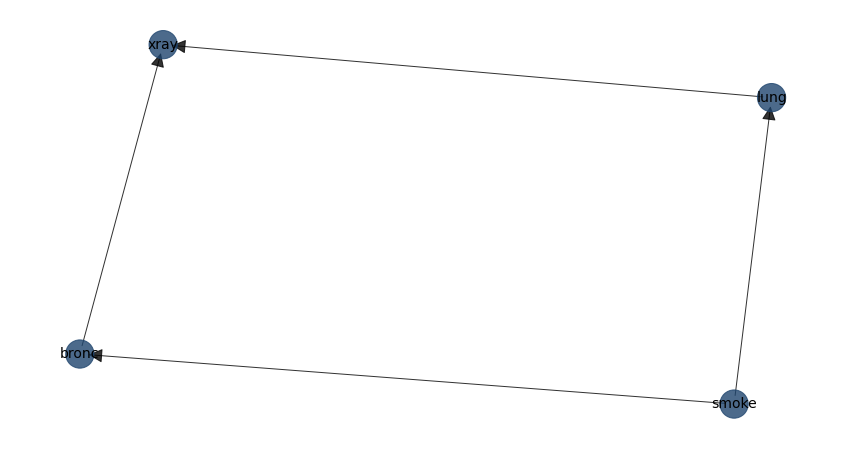

[bnlearn] >Removing columns from dataframe to make consistent with DAG [['asia' 'tub' 'either' 'dysp']]
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of smoke:
+----------+----------+
| smoke(0) | 0.493909 |
+----------+----------+
| smoke(1) | 0.506091 |
+----------+----------+
[bnlearn] >CPD of lung:
+---------+---------------------+---------------------+
| smoke   | smoke(0)            | smoke(1)            |
+---------+---------------------+---------------------+
| lung(0) | 0.14062212405669058 | 0.05478713849470092 |
+---------+---------------------+---------------------+
| lung(1) | 0.8593778759433094  | 0.945212861505299   |
+---------+---------------------+---------------------+
[bnlearn] >CPD of bronc:
+----------+--------------------+--------------------+
| smoke    | smoke(0)           | smoke(1)           |
+----------+--------------------+--------------------+
| bronc(0) | 0.5853119823302043 | 0.3245913418358182 |
+----------+------------

Generating for node: xray: 100%|██████████| 4/4 [00:00<00:00, 393.51it/s]


[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+----+--------+-----------+
|    |   lung |         p |
+====+========+===========+
|  0 |      0 | 0.0547871 |
+----+--------+-----------+
|  1 |      1 | 0.945213  |
+----+--------+-----------+
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+----+--------+-----------+
|    |   lung |         p |
+====+========+===========+
|  0 |      0 | 0.0547871 |
+----+--------+-----------+
|  1 |      1 | 0.945213  |
+----+--------+-----------+
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+----+---------+--------+----------+
|    |   bronc |   lung |        p |
+====+=========+========+==========+
|  0 |       0 |      0 | 0.113287 |
+----+---------+--------+----------+
|  1 |       1 |      0 | 0.229935 |
+----+---------+--------+----------+
|  2 |       0 |      1 | 0.218659 |
+----+---------+--------+----------+
|  3 |       1 |      1 | 0.438119 |
+----+---------+--------+----------+
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+----+---------+--------+----------+
|    |   bronc |   lung |        p |
+====+=========+========+==========+
|  0 |       0 |      0 | 0.35196  |
+----+---------+--------+----------+
|  1 |       1 |      0 | 0.243233 |
+----+---------+--------+----------+
|  2 |       0 |      1 | 0.240637 |
+----+---------+--------+----------+
|  3 |       1 |      1 | 0.164169 |
+----+---------+--------+----------+
['smoke', 'lung', 'bronc', 'xray']


,lung,bronc,p
0,0,0,0.351960
1,0,1,0.243233
2,1,0,0.240637
3,1,1,0.164169


In [70]:
df = bn.import_example('asia')
# from tabulate import tabulate
# print(tabulate(df.head(), tablefmt="grid", headers="keys"))
edges = [('smoke', 'lung'),
         ('smoke', 'bronc'),
         ('lung', 'xray'),
         ('bronc', 'xray')]

# Make the actual Bayesian DAG
DAG = bn.make_DAG(edges, verbose=0)
bn.plot(DAG)

# Learn its parameters from data and perform the inference.
DAG = bn.parameter_learning.fit(DAG, df, verbose=3)
# Print the CPDs
bn.print_CPD(DAG)

# Sampling
df_sampling = bn.sampling(DAG, n=1000)

# Make inference
q1 = bn.inference.fit(DAG, variables=['lung'], evidence={'smoke': 1}, verbose=3)
q2 = bn.inference.fit(DAG, variables=['bronc'], evidence={'smoke': 1}, verbose=0)
q3 = bn.inference.fit(DAG, variables=['lung'], evidence={'smoke': 1, 'bronc': 1})
q4 = bn.inference.fit(DAG, variables=['bronc', 'lung'], evidence={'smoke': 1, 'xray': 0})
q4 = bn.inference.fit(DAG, variables=['bronc', 'lung'], evidence={'smoke': 0, 'xray': 0})

print(bn.topological_sort(DAG))

bn.query2df(q4)

In [ ]:
# sampling
df = bn.sampling(DAG_1, n=5000)
DAG_3 = bn.structure_learning.fit(df)
bn.plot(DAG_3, pos=graph['pos'])

[bnlearn] >Import <asia>
[bnlearn] >Loading bif file </Users/jason/opt/anaconda3/envs/pytorch38/lib/python3.8/site-packages/bnlearn/data/asia.bif>
[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


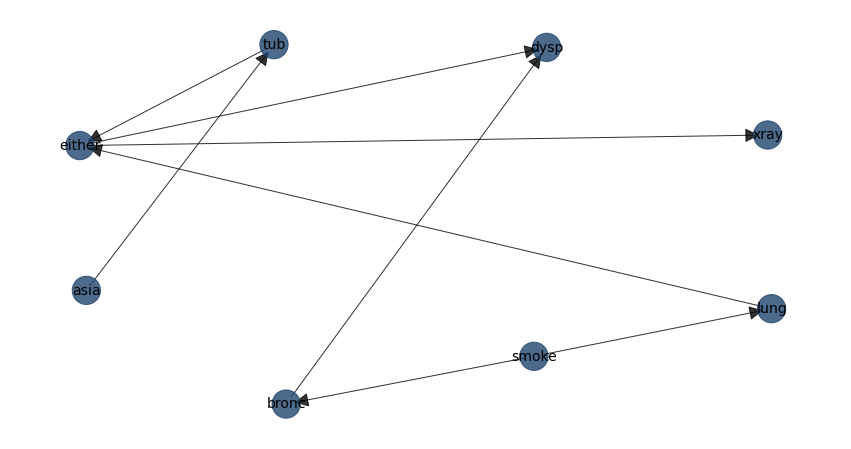

[bnlearn] >Forward sampling for 10000 samples..


Generating for node: dysp: 100%|██████████| 8/8 [00:00<00:00, 186.12it/s]

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Filter edges based on black_list/white_list


In [ ]:
DAG = bn.import_DAG('asia')
# plot ground truth
G = bn.plot(DAG)
# Sampling
df = bn.sampling(DAG, n=10000)
model_wl = bn.structure_learning.fit(df, methodtype='hc', white_list=['asia', 'tub', 'bronc', 'xray', 'smoke'], bw_list_method='edges')
# bn.plot(model_wl, pos=G['pos'])

# model_bl = bn.structure_learning.fit(df, methodtype='hc', black_list=['asia', 'tub'], bw_list_method='edges')
# bn.plot(model_bl, pos=G['pos'])
# Compare models
# bn.compare_networks(model_bl, model_wl, pos=G['pos'])

In [ ]:
# %% Adjust some edge properties

# Load asia DAG
df = bn.import_example(data='asia')
# Structure learning of sampled dataset
model = bn.structure_learning.fit(df)
# plot static
G = bn.plot(model)
# Compute associations with the chi_square test statistic
model = bn.independence_test(model, df)

# Set some edge properties
edge_properties = bn.get_edge_properties(model)
edge_properties['either', 'xray']['color']='#8A0707'
edge_properties['either', 'xray']['weight']=4
edge_properties['bronc', 'dysp']['weight']=10
edge_properties['bronc', 'dysp']['color']='#8A0707'

# Set some node properties
node_properties = bn.get_node_properties(model)
node_properties['xray']['node_color']='#8A0707'
node_properties['xray']['node_size']=20

# Plot
params_static={'edge_alpha': 0.6, 'arrowstyle': '->', 'arrowsize': 60}
bn.plot(model, interactive=False, node_properties=node_properties, edge_properties=edge_properties, params_static=params_static)

In [ ]:
# BNLEARN
model = bn.structure_learning.fit(df, methodtype='tan', class_node='DISPLACEM0', scoretype='bic')
model_bn = bn.parameter_learning.fit(model, df, methodtype='ml')  # maximum likelihood estimator
query=bn.inference.fit(model_bn, variables=['DISPLACEM0'], evidence={'RApp1': 1})

In [ ]:
df = bn.import_example('asia')
edges = [('smoke', 'lung'),
         ('smoke', 'bronc'),
         ('lung', 'xray'),
         ('bronc', 'xray')]

df = df[['smoke', 'lung', 'bronc', 'xray']]

print(df.head())

# Make the actual Bayesian DAG
DAG = bn.make_DAG(edges, verbose=0, methodtype='bayes')
model = bn.parameter_learning.fit(DAG, df, verbose=3)
# Generate some data based on DAG
df = bn.sampling(model, n=1000)
# Make predictions
Pout = bn.predict(model, df, variables=['bronc', 'xray'])

[bnlearn] >Extracting files..


Generating for node: dysp: 100%|██████████| 8/8 [00:00<00:00, 103.96it/s]


   smoke  lung  bronc  xray
0      1     1      1     1
1      1     1      1     1
2      1     1      1     1
3      0     1      0     1
4      0     1      0     1
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of smoke:
+----------+----------+
| smoke(0) | 0.494091 |
+----------+----------+
| smoke(1) | 0.505909 |
+----------+----------+
[bnlearn] >CPD of lung:
+---------+---------------------+---------------------+
| smoke   | smoke(0)            | smoke(1)            |
+---------+---------------------+---------------------+
| lung(0) | 0.14461821527138916 | 0.05211141060197664 |
+---------+---------------------+---------------------+
| lung(1) | 0.8553817847286108  | 0.9478885893980233  |
+---------+---------------------+---------------------+
[bnlearn] >CPD of bronc:
+----------+--------------------+--------------------+
| smoke    | smoke(0)           | smoke(1)           |
+----------+--------------------+--------------------+
| bronc(0) | 0.

Generating for node: xray: 100%|██████████| 4/4 [00:00<00:00, 329.33it/s]


[bnlearn]> Remaining columns for inference: 2


100%|██████████| 4/4 [00:00<00:00, 80.13it/s]
